## **I. Import libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from dataprep.datasets import load_dataset
from dataprep.eda import create_report, plot
import scipy
import warnings
warnings.filterwarnings('ignore')
from dataprep.clean import clean_headers
from scipy import stats
import re
from wordcloud import WordCloud, STOPWORDS
np.set_printoptions(suppress=True)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

## **II. Read information basic dataset**

In [2]:
data = pd.read_csv('data_raw/Global YouTube Statistics.csv', encoding='latin-1') #'ISO-8859-1'

In [3]:
data.reset_index(drop= True, inplace= True)

In [4]:
data.head()

rank                    Youtuber  subscribers   video views  \
0     1                    T-Series    245000000  2.280000e+11   
1     2              YouTube Movies    170000000  0.000000e+00   
2     3                     MrBeast    166000000  2.836884e+10   
3     4  Cocomelon - Nursery Rhymes    162000000  1.640000e+11   
4     5                   SET India    159000000  1.480000e+11   

           category                       Title  uploads        Country  \
0             Music                    T-Series    20082          India   
1  Film & Animation               youtubemovies        1  United States   
2     Entertainment                     MrBeast      741  United States   
3         Education  Cocomelon - Nursery Rhymes      966  United States   
4             Shows                   SET India   116536          India   

  Abbreviation   channel_type  video_views_rank  country_rank  \
0           IN          Music               1.0           1.0   
1           US          Games         4055159.0        7670.0   
2           US  Entertainment              48.0           1.0   
3           US      Education               2.0           2.0   
4           IN  Entertainment               3.0           2.0   

   channel_type_rank  video_views_for_the_last_30_days  \
0                1.0                      2.258000e+09   
1             7423.0                      1.200000e+01   
2                1.0                      1.348000e+09   
3                1.0                      1.975000e+09   
4                2.0                      1.824000e+09   

   lowest_monthly_earnings  highest_monthly_earnings  lowest_yearly_earnings  \
0                 564600.0                9000000.00              6800000.00   
1                      0.0                      0.05                    0.04   
2                 337000.0                5400000.00              4000000.00   
3                 493800.0                7900000.00              5900000.00   
4                 455900.0                7300000.00              5500000.00   

   highest_yearly_earnings  subscribers_for_last_30_days  created_year  \
0             1.084000e+08                     2000000.0        2006.0   
1             5.800000e-01                           NaN        2006.0   
2             6.470000e+07                     8000000.0        2012.0   
3             9.480000e+07                     1000000.0        2006.0   
4             8.750000e+07                     1000000.0        2006.0   

  created_month  created_date  Gross tertiary education enrollment (%)  \
0           Mar          13.0                                     28.1   
1           Mar           5.0                                     88.2   
2           Feb          20.0                                     88.2   
3           Sep           1.0                                     88.2   
4           Sep          20.0                                     28.1   

     Population  Unemployment rate  Urban_population   Latitude  Longitude  
0  1.366418e+09               5.36       471031528.0  20.593684  78.962880  
1  3.282395e+08              14.70       270663028.0  37.090240 -95.712891  
2  3.282395e+08              14.70       270663028.0  37.090240 -95.712891  
3  3.282395e+08              14.70       270663028.0  37.090240 -95.712891  
4  1.366418e+09               5.36       471031528.0  20.593684  78.962880

In [5]:
data.tail()

rank                  Youtuber  subscribers   video views  \
990   991             Natan por Aï¿     12300000  9.029610e+09   
991   992  Free Fire India Official     12300000  1.674410e+09   
992   993                     Panda     12300000  2.214684e+09   
993   994               RobTopGames     12300000  3.741235e+08   
994   995              Make Joke Of     12300000  2.129774e+09   

           category                     Title  uploads         Country  \
990          Sports             Natan por Aï¿     1200          Brazil   
991  People & Blogs  Free Fire India Official     1500           India   
992             NaN               HybridPanda     2452  United Kingdom   
993          Gaming               RobTopGames       39          Sweden   
994          Comedy              Make Joke Of       62           India   

    Abbreviation   channel_type  video_views_rank  country_rank  \
990           BR  Entertainment             525.0          55.0   
991           IN          Games            6141.0         125.0   
992           GB          Games          129005.0         867.0   
993           SE          Games           35112.0           4.0   
994           IN         Comedy            4568.0         125.0   

     channel_type_rank  video_views_for_the_last_30_days  \
990              172.0                       552513000.0   
991               69.0                        64735000.0   
992             1202.0                           67035.0   
993               69.0                         3871000.0   
994               44.0                        24000000.0   

     lowest_monthly_earnings  highest_monthly_earnings  \
990                 138100.0                 2200000.0   
991                  16200.0                  258900.0   
992                     17.0                     268.0   
993                    968.0                   15500.0   
994                   6000.0                   96000.0   

     lowest_yearly_earnings  highest_yearly_earnings  \
990               1700000.0               26500000.0   
991                194200.0                3100000.0   
992                   201.0                   3200.0   
993                 11600.0                 185800.0   
994                 72000.0                1200000.0   

     subscribers_for_last_30_days  created_year created_month  created_date  \
990                      700000.0        2017.0           Feb          12.0   
991                      300000.0        2018.0           Sep          14.0   
992                        1000.0        2006.0           Sep          11.0   
993                      100000.0        2012.0           May           9.0   
994                      100000.0        2017.0           Aug           1.0   

     Gross tertiary education enrollment (%)    Population  Unemployment rate  \
990                                     51.3  2.125594e+08              12.08   
991                                     28.1  1.366418e+09               5.36   
992                                     60.0  6.683440e+07               3.85   
993                                     67.0  1.028545e+07               6.48   
994                                     28.1  1.366418e+09               5.36   

     Urban_population   Latitude  Longitude  
990       183241641.0 -14.235004 -51.925280  
991       471031528.0  20.593684  78.962880  
992        55908316.0  55.378051  -3.435973  
993         9021165.0  60.128161  18.643501  
994       471031528.0  20.593684  78.962880

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     995 non-null    int64  
 1   Youtuber                                 995 non-null    object 
 2   subscribers                              995 non-null    int64  
 3   video views                              995 non-null    float64
 4   category                                 949 non-null    object 
 5   Title                                    995 non-null    object 
 6   uploads                                  995 non-null    int64  
 7   Country                                  873 non-null    object 
 8   Abbreviation                             873 non-null    object 
 9   channel_type                             965 non-null    object 
 10  video_views_rank                         994 non-n

In [7]:
data.shape

(995, 28)

In [8]:
data.columns

Index(['rank', 'Youtuber', 'subscribers', 'video views', 'category', 'Title',
       'uploads', 'Country', 'Abbreviation', 'channel_type',
       'video_views_rank', 'country_rank', 'channel_type_rank',
       'video_views_for_the_last_30_days', 'lowest_monthly_earnings',
       'highest_monthly_earnings', 'lowest_yearly_earnings',
       'highest_yearly_earnings', 'subscribers_for_last_30_days',
       'created_year', 'created_month', 'created_date',
       'Gross tertiary education enrollment (%)', 'Population',
       'Unemployment rate', 'Urban_population', 'Latitude', 'Longitude'],
      dtype='object')

In [9]:
#clean columns in the dataset
data.columns = data.columns.str.replace('_',' ')
data.columns = data.columns.str.title()
data.columns

Index(['Rank', 'Youtuber', 'Subscribers', 'Video Views', 'Category', 'Title',
       'Uploads', 'Country', 'Abbreviation', 'Channel Type',
       'Video Views Rank', 'Country Rank', 'Channel Type Rank',
       'Video Views For The Last 30 Days', 'Lowest Monthly Earnings',
       'Highest Monthly Earnings', 'Lowest Yearly Earnings',
       'Highest Yearly Earnings', 'Subscribers For Last 30 Days',
       'Created Year', 'Created Month', 'Created Date',
       'Gross Tertiary Education Enrollment (%)', 'Population',
       'Unemployment Rate', 'Urban Population', 'Latitude', 'Longitude'],
      dtype='object')

## **III. Select variables to analyst**

In [10]:
youtube = data[['Youtuber', 'Subscribers', 'Video Views', 'Uploads', 'Category', 'Country', 'Abbreviation', 'Lowest Monthly Earnings', 'Highest Monthly Earnings', 'Gross Tertiary Education Enrollment (%)', 'Unemployment Rate', 'Population', 'Urban Population', 'Created Year']] #, 'Latitude', 'Longitude'

In [11]:
youtube.head(10)

Youtuber  Subscribers   Video Views  Uploads  \
0                    T-Series    245000000  2.280000e+11    20082   
1              YouTube Movies    170000000  0.000000e+00        1   
2                     MrBeast    166000000  2.836884e+10      741   
3  Cocomelon - Nursery Rhymes    162000000  1.640000e+11      966   
4                   SET India    159000000  1.480000e+11   116536   
5                       Music    119000000  0.000000e+00        0   
6         ýýý Kids Diana Show    112000000  9.324704e+10     1111   
7                   PewDiePie    111000000  2.905804e+10     4716   
8                 Like Nastya    106000000  9.047906e+10      493   
9               Vlad and Niki     98900000  7.718017e+10      574   

           Category        Country Abbreviation  Lowest Monthly Earnings  \
0             Music          India           IN                 564600.0   
1  Film & Animation  United States           US                      0.0   
2     Entertainment  United States           US                 337000.0   
3         Education  United States           US                 493800.0   
4             Shows          India           IN                 455900.0   
5               NaN            NaN          NaN                      0.0   
6    People & Blogs  United States           US                 182900.0   
7            Gaming          Japan           JP                   9800.0   
8    People & Blogs         Russia           RU                  12200.0   
9     Entertainment  United States           US                 145100.0   

   Highest Monthly Earnings  Gross Tertiary Education Enrollment (%)  \
0                9000000.00                                     28.1   
1                      0.05                                     88.2   
2                5400000.00                                     88.2   
3                7900000.00                                     88.2   
4                7300000.00                                     28.1   
5                      0.00                                      NaN   
6                2900000.00                                     88.2   
7                 156700.00                                     63.2   
8                 195800.00                                     81.9   
9                2300000.00                                     88.2   

   Unemployment Rate    Population  Urban Population  Created Year  
0               5.36  1.366418e+09       471031528.0        2006.0  
1              14.70  3.282395e+08       270663028.0        2006.0  
2              14.70  3.282395e+08       270663028.0        2012.0  
3              14.70  3.282395e+08       270663028.0        2006.0  
4               5.36  1.366418e+09       471031528.0        2006.0  
5                NaN           NaN               NaN        2013.0  
6              14.70  3.282395e+08       270663028.0        2015.0  
7               2.29  1.262266e+08       115782416.0        2010.0  
8               4.59  1.443735e+08       107683889.0        2016.0  
9              14.70  3.282395e+08       270663028.0        2018.0

- There are special characters in the data columns 'Youtuber' and 'Title' that need to be processed.

## **IV. Data Cleaning**

In [12]:
#remove special characters
pattern = r'[^a-zA-Z0-9\s.,!?&\'-]'

#Youtuber feature
youtube['Youtuber'] = youtube['Youtuber'].apply(lambda x: re.sub(pattern, '', x)) 
youtube['Youtuber'] = youtube['Youtuber'].str.strip() 
youtube['Youtuber'] = youtube['Youtuber'].str.lstrip('- ') 

In [13]:
#check special characters in Youtuber feature
filter_youtuber_rows = youtube['Youtuber'].str.contains(pattern, regex = True)
filter_youtuber_rows_results = filter_youtuber_rows[filter_youtuber_rows == True]
print("Youtuber's special characters:",filter_youtuber_rows_results)

Youtuber's special characters: Series([], Name: Youtuber, dtype: bool)


In [14]:
youtube.head()

Youtuber  Subscribers   Video Views  Uploads  \
0                    T-Series    245000000  2.280000e+11    20082   
1              YouTube Movies    170000000  0.000000e+00        1   
2                     MrBeast    166000000  2.836884e+10      741   
3  Cocomelon - Nursery Rhymes    162000000  1.640000e+11      966   
4                   SET India    159000000  1.480000e+11   116536   

           Category        Country Abbreviation  Lowest Monthly Earnings  \
0             Music          India           IN                 564600.0   
1  Film & Animation  United States           US                      0.0   
2     Entertainment  United States           US                 337000.0   
3         Education  United States           US                 493800.0   
4             Shows          India           IN                 455900.0   

   Highest Monthly Earnings  Gross Tertiary Education Enrollment (%)  \
0                9000000.00                                     28.1   
1                      0.05                                     88.2   
2                5400000.00                                     88.2   
3                7900000.00                                     88.2   
4                7300000.00                                     28.1   

   Unemployment Rate    Population  Urban Population  Created Year  
0               5.36  1.366418e+09       471031528.0        2006.0  
1              14.70  3.282395e+08       270663028.0        2006.0  
2              14.70  3.282395e+08       270663028.0        2012.0  
3              14.70  3.282395e+08       270663028.0        2006.0  
4               5.36  1.366418e+09       471031528.0        2006.0

In [15]:
youtube.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 14 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Youtuber                                 995 non-null    object 
 1   Subscribers                              995 non-null    int64  
 2   Video Views                              995 non-null    float64
 3   Uploads                                  995 non-null    int64  
 4   Category                                 949 non-null    object 
 5   Country                                  873 non-null    object 
 6   Abbreviation                             873 non-null    object 
 7   Lowest Monthly Earnings                  995 non-null    float64
 8   Highest Monthly Earnings                 995 non-null    float64
 9   Gross Tertiary Education Enrollment (%)  872 non-null    float64
 10  Unemployment Rate                        872 non-n

In [16]:
youtube.columns

Index(['Youtuber', 'Subscribers', 'Video Views', 'Uploads', 'Category',
       'Country', 'Abbreviation', 'Lowest Monthly Earnings',
       'Highest Monthly Earnings', 'Gross Tertiary Education Enrollment (%)',
       'Unemployment Rate', 'Population', 'Urban Population', 'Created Year'],
      dtype='object')

In [17]:
#Remove data null in column 'Created Year'
youtube = youtube.dropna(subset= ['Created Year'])
youtube['Created Year'] = youtube['Created Year'].astype('object')
youtube.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 990 entries, 0 to 994
Data columns (total 14 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Youtuber                                 990 non-null    object 
 1   Subscribers                              990 non-null    int64  
 2   Video Views                              990 non-null    float64
 3   Uploads                                  990 non-null    int64  
 4   Category                                 944 non-null    object 
 5   Country                                  870 non-null    object 
 6   Abbreviation                             870 non-null    object 
 7   Lowest Monthly Earnings                  990 non-null    float64
 8   Highest Monthly Earnings                 990 non-null    float64
 9   Gross Tertiary Education Enrollment (%)  869 non-null    float64
 10  Unemployment Rate                        869 non-n

In [18]:
#Check Created Year data
youtube['Created Year'].unique()

array([2006.0, 2012.0, 2013.0, 2015.0, 2010.0, 2016.0, 2018.0, 2014.0,
       2007.0, 2020.0, 2008.0, 2005.0, 2011.0, 2009.0, 2017.0, 2021.0,
       1970.0, 2019.0, 2022.0], dtype=object)

In [19]:
#Check Created Year is 1970
youtube[youtube['Created Year'] == 1970]

Youtuber  Subscribers   Video Views  Uploads         Category  \
101  YouTube     36300000  3.010785e+09      744  News & Politics   

           Country Abbreviation  Lowest Monthly Earnings  \
101  United States           US                   5300.0   

     Highest Monthly Earnings  Gross Tertiary Education Enrollment (%)  \
101                   84400.0                                     88.2   

     Unemployment Rate   Population  Urban Population Created Year  
101               14.7  328239523.0       270663028.0       1970.0

- YouTube was launched on February 14, 2005. We can observe a confusion in the founding date of this YouTube channel.  
- Since this channel could be considered a representative channel for the YouTube platform, we will temporarily replace the channel's founding date with the inception date of YouTube.  

In [20]:
youtube[youtube['Youtuber'] == 'YouTube'] = youtube[youtube['Youtuber'] == 'YouTube'].replace(1970, 2005)
youtube[youtube['Youtuber'] == 'YouTube']

Youtuber  Subscribers   Video Views  Uploads         Category  \
101  YouTube     36300000  3.010785e+09      744  News & Politics   

           Country Abbreviation  Lowest Monthly Earnings  \
101  United States           US                   5300.0   

     Highest Monthly Earnings  Gross Tertiary Education Enrollment (%)  \
101                   84400.0                                     88.2   

     Unemployment Rate   Population  Urban Population Created Year  
101               14.7  328239523.0       270663028.0         2005

In [21]:
youtube['Created Year'].unique()

array([2006.0, 2012.0, 2013.0, 2015.0, 2010.0, 2016.0, 2018.0, 2014.0,
       2007.0, 2020.0, 2008.0, 2005.0, 2011.0, 2009.0, 2017.0, 2021.0,
       2019.0, 2022.0], dtype=object)

In [22]:
#After remomved characters, we will some blanks data in column 'Youtuber'. Let's check it
blanks_data_youtuber = youtube[youtube['Youtuber'] == '']
blanks_data_youtuber

Youtuber  Subscribers   Video Views  Uploads          Category  \
64               43200000  3.645873e+10     1478  Film & Animation   
161              30400000  1.799996e+10      532               NaN   
433              19000000  4.924054e+09       60         Education   
447              18800000  9.594189e+09      530     Entertainment   
561              16500000  2.440934e+09      421     Entertainment   
606              15900000  1.845330e+09        0    People & Blogs   
632              15500000  8.265130e+09     1021             Shows   
700              14900000  4.390980e+05        1    People & Blogs   
707              14800000  7.018015e+09     2387     Howto & Style   
714              14700000  2.230986e+09     1385     Entertainment   
752              14400000  6.001543e+08      364     Entertainment   
784              14100000  3.920221e+09       65     Entertainment   
795              14000000  7.719743e+09     2210            Gaming   
810              13900000  8.451755e+09      504               NaN   
866              13300000  6.482687e+09      608    People & Blogs   
920              12900000  5.585085e+09     1255             Shows   

           Country Abbreviation  Lowest Monthly Earnings  \
64          Russia           RU                  75900.0   
161  United States           US                  30700.0   
433  United States           US                   5400.0   
447        Ukraine           UA                  17000.0   
561  United States           US                   5500.0   
606         Russia           RU                      0.0   
632   Saudi Arabia           SA                  33800.0   
700         Russia           RU                      2.0   
707        Ukraine           UA                  11800.0   
714   Saudi Arabia           SA                    673.0   
752    South Korea           KR                    342.0   
784            NaN          NaN                      5.0   
795         Russia           RU                  37600.0   
810  United States           US                  28600.0   
866         Russia           RU                  22600.0   
920        Ukraine           UA                  17800.0   

     Highest Monthly Earnings  Gross Tertiary Education Enrollment (%)  \
64                  1200000.0                                     81.9   
161                  491700.0                                     88.2   
433                   86300.0                                     88.2   
447                  272000.0                                     82.7   
561                   87800.0                                     88.2   
606                       0.0                                     81.9   
632                  540100.0                                     68.0   
700                      31.0                                     81.9   
707                  188500.0                                     82.7   
714                   10800.0                                     68.0   
752                    5500.0                                     94.3   
784                      81.0                                      NaN   
795                  602300.0                                     81.9   
810                  457000.0                                     88.2   
866                  361000.0                                     81.9   
920                  284500.0                                     82.7   

     Unemployment Rate   Population  Urban Population Created Year  
64                4.59  144373535.0       107683889.0       2011.0  
161              14.70  328239523.0       270663028.0       2018.0  
433              14.70  328239523.0       270663028.0       2018.0  
447               8.88   44385155.0        30835699.0       2014.0  
561              14.70  328239523.0       270663028.0       2014.0  
606               4.59  144373535.0       107683889.0       2017.0  
632               5.93   34268528.0        2880783

In [23]:
# Remove rows from with blank Youtuber as these are channels with only special characters
youtube = youtube.drop(blanks_data_youtuber.index)
youtube.reset_index(drop= True, inplace= True)
youtube[youtube['Youtuber'] == '']

Empty DataFrame
Columns: [Youtuber, Subscribers, Video Views, Uploads, Category, Country, Abbreviation, Lowest Monthly Earnings, Highest Monthly Earnings, Gross Tertiary Education Enrollment (%), Unemployment Rate, Population, Urban Population, Created Year]
Index: []

In [24]:
#Check duplicate data
youtube.duplicated().sum()

0

In [25]:
#Check zero data video views
zero_views = youtube[youtube['Video Views'] == 0]
zero_views

Youtuber  Subscribers  Video Views  Uploads          Category  \
1        YouTube Movies    170000000          0.0        1  Film & Animation   
5                 Music    119000000          0.0        0               NaN   
12               Gaming     93600000          0.0        0               NaN   
18               Sports     75000000          0.0        3               NaN   
101                News     36300000          0.0        0               NaN   
171  Popular on YouTube     29300000          0.0        3               NaN   
357   Minecraft - Topic     20900000          0.0        0               NaN   
584                Live     16100000          0.0        0               NaN   

           Country Abbreviation  Lowest Monthly Earnings  \
1    United States           US                      0.0   
5              NaN          NaN                      0.0   
12             NaN          NaN                      0.0   
18   United States           US                      0.0   
101            NaN          NaN                      0.0   
171            NaN          NaN                      0.0   
357            NaN          NaN                      0.0   
584            NaN          NaN                      0.0   

     Highest Monthly Earnings  Gross Tertiary Education Enrollment (%)  \
1                        0.05                                     88.2   
5                        0.00                                      NaN   
12                       0.00                                      NaN   
18                       0.06                                     88.2   
101                      0.00                                      NaN   
171                      0.00                                      NaN   
357                      0.00                                      NaN   
584                      0.00                                      NaN   

     Unemployment Rate   Population  Urban Population Created Year  
1                 14.7  328239523.0       270663028.0       2006.0  
5                  NaN          NaN               NaN       2013.0  
12                 NaN          NaN               NaN       2013.0  
18                14.7  328239523.0       270663028.0       2006.0  
101                NaN          NaN               NaN       2013.0  
171                NaN          NaN               NaN       2017.0  
357                NaN          NaN               NaN       2013.0  
584                NaN          NaN               NaN       2015.0

- There are a number of YouTube channels which have 0 video views, these appear to be YouTube topics & not valid channels, for the purpose of this analysis these rows will be removed

In [26]:
#Remove zero data video views
youtube = youtube.drop(zero_views.index)
youtube.reset_index(drop= True, inplace= True)
youtube[youtube['Video Views'] == 0]

Empty DataFrame
Columns: [Youtuber, Subscribers, Video Views, Uploads, Category, Country, Abbreviation, Lowest Monthly Earnings, Highest Monthly Earnings, Gross Tertiary Education Enrollment (%), Unemployment Rate, Population, Urban Population, Created Year]
Index: []

In [27]:
youtube.shape

(966, 14)

In [28]:
#Check null/nan data
youtube.isnull().sum()

Youtuber                                     0
Subscribers                                  0
Video Views                                  0
Uploads                                      0
Category                                    37
Country                                    113
Abbreviation                               113
Lowest Monthly Earnings                      0
Highest Monthly Earnings                     0
Gross Tertiary Education Enrollment (%)    114
Unemployment Rate                          114
Population                                 114
Urban Population                           114
Created Year                                 0
dtype: int64

In [29]:
#There are lots of missing value in the category variables
#We will filter all missing to 'Other'

#Select category columns
categorical_variables = youtube.select_dtypes(include= 'O').columns

#Replace object datatype column missing values with 'Other'
youtube[categorical_variables] = youtube[categorical_variables].fillna('Other')


In [30]:
#check missing value
youtube.isna().sum()

Youtuber                                     0
Subscribers                                  0
Video Views                                  0
Uploads                                      0
Category                                     0
Country                                      0
Abbreviation                                 0
Lowest Monthly Earnings                      0
Highest Monthly Earnings                     0
Gross Tertiary Education Enrollment (%)    114
Unemployment Rate                          114
Population                                 114
Urban Population                           114
Created Year                                 0
dtype: int64

In [31]:
youtube.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 966 entries, 0 to 965
Data columns (total 14 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Youtuber                                 966 non-null    object 
 1   Subscribers                              966 non-null    int64  
 2   Video Views                              966 non-null    float64
 3   Uploads                                  966 non-null    int64  
 4   Category                                 966 non-null    object 
 5   Country                                  966 non-null    object 
 6   Abbreviation                             966 non-null    object 
 7   Lowest Monthly Earnings                  966 non-null    float64
 8   Highest Monthly Earnings                 966 non-null    float64
 9   Gross Tertiary Education Enrollment (%)  852 non-null    float64
 10  Unemployment Rate                        852 non-n

In [32]:
#Youtube is not null
youtube_not_null = youtube.dropna(subset= ['Gross Tertiary Education Enrollment (%)','Unemployment Rate', 'Population', 'Urban Population'])

#Mean Education Enrollment
mean_edu = round(youtube_not_null['Gross Tertiary Education Enrollment (%)'].mean(),1)
print('Mean Gross Tertiary Education Enrollment:', mean_edu)

#Mean Unemployment Rate
mean_unemp = round(youtube_not_null['Unemployment Rate'].mean(),1)
print('Mean Unemployment Rate:', mean_unemp)

#Mean Population
mean_popu = round(youtube_not_null['Population'].mean(),0)
print('Mean Population:', mean_popu)

#Mean Urban Population
mean_urban = round(youtube_not_null['Urban Population'].mean(),0)
print('Mean Urban Population:', mean_urban)

Mean Gross Tertiary Education Enrollment: 63.2
Mean Unemployment Rate: 9.3
Mean Population: 436369043.0
Mean Urban Population: 226156206.0


In [33]:
#There are lots of missing value in the numeric variables
#Replace object datatype column missing values with Mean Values
youtube['Gross Tertiary Education Enrollment (%)'] = youtube['Gross Tertiary Education Enrollment (%)'].fillna(mean_edu)
youtube['Unemployment Rate'] = youtube['Unemployment Rate'].fillna(mean_unemp)
youtube['Population'] = youtube['Population'].fillna(mean_popu)
youtube['Urban Population'] = youtube['Urban Population'].fillna(mean_urban)

In [34]:
youtube.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 966 entries, 0 to 965
Data columns (total 14 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Youtuber                                 966 non-null    object 
 1   Subscribers                              966 non-null    int64  
 2   Video Views                              966 non-null    float64
 3   Uploads                                  966 non-null    int64  
 4   Category                                 966 non-null    object 
 5   Country                                  966 non-null    object 
 6   Abbreviation                             966 non-null    object 
 7   Lowest Monthly Earnings                  966 non-null    float64
 8   Highest Monthly Earnings                 966 non-null    float64
 9   Gross Tertiary Education Enrollment (%)  966 non-null    float64
 10  Unemployment Rate                        966 non-n

In [35]:
# Convert several float data typescolumns to integars
youtube = youtube.astype({
    'Video Views': 'int64',
    'Created Year': 'int64',
    'Population': 'int64',
    'Urban Population': 'int64'
})

# Validate results of datatype change
youtube.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 966 entries, 0 to 965
Data columns (total 14 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Youtuber                                 966 non-null    object 
 1   Subscribers                              966 non-null    int64  
 2   Video Views                              966 non-null    int64  
 3   Uploads                                  966 non-null    int64  
 4   Category                                 966 non-null    object 
 5   Country                                  966 non-null    object 
 6   Abbreviation                             966 non-null    object 
 7   Lowest Monthly Earnings                  966 non-null    float64
 8   Highest Monthly Earnings                 966 non-null    float64
 9   Gross Tertiary Education Enrollment (%)  966 non-null    float64
 10  Unemployment Rate                        966 non-n

In [36]:
#sorting the dataframe and resetting index (by 'Subscribers)
youtube = youtube.sort_values(by = 'Subscribers', ascending= False).reset_index(drop= True)
youtube.head()

Youtuber  Subscribers   Video Views  Uploads  \
0                    T-Series    245000000  228000000000    20082   
1                     MrBeast    166000000   28368841870      741   
2  Cocomelon - Nursery Rhymes    162000000  164000000000      966   
3                   SET India    159000000  148000000000   116536   
4             Kids Diana Show    112000000   93247040539     1111   

         Category        Country Abbreviation  Lowest Monthly Earnings  \
0           Music          India           IN                 564600.0   
1   Entertainment  United States           US                 337000.0   
2       Education  United States           US                 493800.0   
3           Shows          India           IN                 455900.0   
4  People & Blogs  United States           US                 182900.0   

   Highest Monthly Earnings  Gross Tertiary Education Enrollment (%)  \
0                 9000000.0                                     28.1   
1                 5400000.0                                     88.2   
2                 7900000.0                                     88.2   
3                 7300000.0                                     28.1   
4                 2900000.0                                     88.2   

   Unemployment Rate  Population  Urban Population  Created Year  
0               5.36  1366417754         471031528          2006  
1              14.70   328239523         270663028          2012  
2              14.70   328239523         270663028          2006  
3               5.36  1366417754         471031528          2006  
4              14.70   328239523         270663028          2015

In [37]:
youtube.to_csv('data_cleaned/Global_Youtube_Statistics_2023_cleaned.csv', index = False)

- This dataset cleaned

## **V. Exploratory Data Analysis**

`Create color palettes`

In [38]:
youtube_color_barchart_10 = ['#f00000','#ff2424','#ff3838','#ff554f','#fb7571','#cccccc','#b6b6b6','#9e9e9e','#888888','#777777']
sb.color_palette(youtube_color_barchart_10)

[(0.9411764705882353, 0.0, 0.0),
 (1.0, 0.1411764705882353, 0.1411764705882353),
 (1.0, 0.2196078431372549, 0.2196078431372549),
 (1.0, 0.3333333333333333, 0.30980392156862746),
 (0.984313725490196, 0.4588235294117647, 0.44313725490196076),
 (0.8, 0.8, 0.8),
 (0.7137254901960784, 0.7137254901960784, 0.7137254901960784),
 (0.6196078431372549, 0.6196078431372549, 0.6196078431372549),
 (0.5333333333333333, 0.5333333333333333, 0.5333333333333333),
 (0.4666666666666667, 0.4666666666666667, 0.4666666666666667)]

In [39]:
youtube_color_donutchart = ['#777777','#9e9e9e','#b6b6b6','#cccccc', '#fb7571', '#ff3838','#f00000']
sb.color_palette(youtube_color_donutchart)

[(0.4666666666666667, 0.4666666666666667, 0.4666666666666667),
 (0.6196078431372549, 0.6196078431372549, 0.6196078431372549),
 (0.7137254901960784, 0.7137254901960784, 0.7137254901960784),
 (0.8, 0.8, 0.8),
 (0.984313725490196, 0.4588235294117647, 0.44313725490196076),
 (1.0, 0.2196078431372549, 0.2196078431372549),
 (0.9411764705882353, 0.0, 0.0)]

In [40]:
youtube_color_barchart_freestyle1 = ['#f00000', '#f00000', '#777777', '#777777', '#777777', '#777777', '#777777', '#777777', '#777777', '#777777', '#777777', '#777777', '#777777', '#777777', '#777777', '#777777', '#777777', '#777777','#777777']
sb.color_palette(youtube_color_barchart_freestyle1)

[(0.9411764705882353, 0.0, 0.0),
 (0.9411764705882353, 0.0, 0.0),
 (0.4666666666666667, 0.4666666666666667, 0.4666666666666667),
 (0.4666666666666667, 0.4666666666666667, 0.4666666666666667),
 (0.4666666666666667, 0.4666666666666667, 0.4666666666666667),
 (0.4666666666666667, 0.4666666666666667, 0.4666666666666667),
 (0.4666666666666667, 0.4666666666666667, 0.4666666666666667),
 (0.4666666666666667, 0.4666666666666667, 0.4666666666666667),
 (0.4666666666666667, 0.4666666666666667, 0.4666666666666667),
 (0.4666666666666667, 0.4666666666666667, 0.4666666666666667),
 (0.4666666666666667, 0.4666666666666667, 0.4666666666666667),
 (0.4666666666666667, 0.4666666666666667, 0.4666666666666667),
 (0.4666666666666667, 0.4666666666666667, 0.4666666666666667),
 (0.4666666666666667, 0.4666666666666667, 0.4666666666666667),
 (0.4666666666666667, 0.4666666666666667, 0.4666666666666667),
 (0.4666666666666667, 0.4666666666666667, 0.4666666666666667),
 (0.4666666666666667, 0.4666666666666667, 0.4666666666666667),
 (0.4666666666666667, 0.4666666666666667, 0.4666666666666667),
 (0.4666666666666667, 0.4666666666666667, 0.4666666666666667)]

In [41]:
youtube_color_barchart_freestyle2 = ['#FE0000','#F4E0B9','#A8A196','#7D7463']
sb.color_palette(youtube_color_barchart_freestyle2)

[(0.996078431372549, 0.0, 0.0),
 (0.9568627450980393, 0.8784313725490196, 0.7254901960784313),
 (0.6588235294117647, 0.6313725490196078, 0.5882352941176471),
 (0.49019607843137253, 0.4549019607843137, 0.38823529411764707)]

In [42]:
youtube_color_barchart_freestyle3 = ['#f00000', '#777777', '#777777', '#777777', '#777777', '#777777', '#777777', '#777777', '#777777', '#777777', '#777777', '#777777', '#777777', '#777777', '#777777', '#777777', '#777777', '#777777', '#777777']
sb.color_palette(youtube_color_barchart_freestyle3)

[(0.9411764705882353, 0.0, 0.0),
 (0.4666666666666667, 0.4666666666666667, 0.4666666666666667),
 (0.4666666666666667, 0.4666666666666667, 0.4666666666666667),
 (0.4666666666666667, 0.4666666666666667, 0.4666666666666667),
 (0.4666666666666667, 0.4666666666666667, 0.4666666666666667),
 (0.4666666666666667, 0.4666666666666667, 0.4666666666666667),
 (0.4666666666666667, 0.4666666666666667, 0.4666666666666667),
 (0.4666666666666667, 0.4666666666666667, 0.4666666666666667),
 (0.4666666666666667, 0.4666666666666667, 0.4666666666666667),
 (0.4666666666666667, 0.4666666666666667, 0.4666666666666667),
 (0.4666666666666667, 0.4666666666666667, 0.4666666666666667),
 (0.4666666666666667, 0.4666666666666667, 0.4666666666666667),
 (0.4666666666666667, 0.4666666666666667, 0.4666666666666667),
 (0.4666666666666667, 0.4666666666666667, 0.4666666666666667),
 (0.4666666666666667, 0.4666666666666667, 0.4666666666666667),
 (0.4666666666666667, 0.4666666666666667, 0.4666666666666667),
 (0.4666666666666667, 0.4666666666666667, 0.4666666666666667),
 (0.4666666666666667, 0.4666666666666667, 0.4666666666666667),
 (0.4666666666666667, 0.4666666666666667, 0.4666666666666667)]

### *Task 1: Who are the Top 10 YouTubers in terms of subscribers and the Top 10 YouTubers with the highest views?*

In [43]:
#Statistics by Subscribers

#Select columns to show output
select_columns = ['Youtuber', 'Subscribers']

#Filter dataframe for top 10 most subscribers Youtuber channels
top_10_subs = youtube[select_columns].head(10)

#Convert 'Subscriber' in millions
top_10_subs['Subscribers (million)'] = (top_10_subs['Subscribers'] / 1000000).astype('int')
top_10_subs = top_10_subs[['Youtuber', 'Subscribers (million)']]

#Show dataframe
top_10_subs

Youtuber  Subscribers (million)
0                    T-Series                    245
1                     MrBeast                    166
2  Cocomelon - Nursery Rhymes                    162
3                   SET India                    159
4             Kids Diana Show                    112
5                   PewDiePie                    111
6                 Like Nastya                    106
7               Vlad and Niki                     98
8           Zee Music Company                     96
9                         WWE                     96

In [44]:
#Statistics by Video Views

#Select columns to show output
select_columns = ['Youtuber', 'Video Views']

#Filter dataframe for top 10 most video views Youtuber channels
youtube_videoviews = youtube[select_columns]
top_10_views = youtube_videoviews.sort_values(by = 'Video Views', ascending= False).head(10)

#Convert 'Video Views' in billions
top_10_views['Video Views (billion)'] = (top_10_views['Video Views'] / 1000000000).astype('int')
top_10_views = top_10_views[['Youtuber', 'Video Views (billion)']].sort_values(by= 'Video Views (billion)', ascending= False).reset_index(drop=True)

#Show dataframe
top_10_views

Youtuber  Video Views (billion)
0                    T-Series                    228
1  Cocomelon - Nursery Rhymes                    164
2                   SET India                    148
3                    Sony SAB                    101
4             Kids Diana Show                     93
5                 Like Nastya                     90
6                         WWE                     77
7               Vlad and Niki                     77
8                      Zee TV                     73
9                   Colors TV                     61

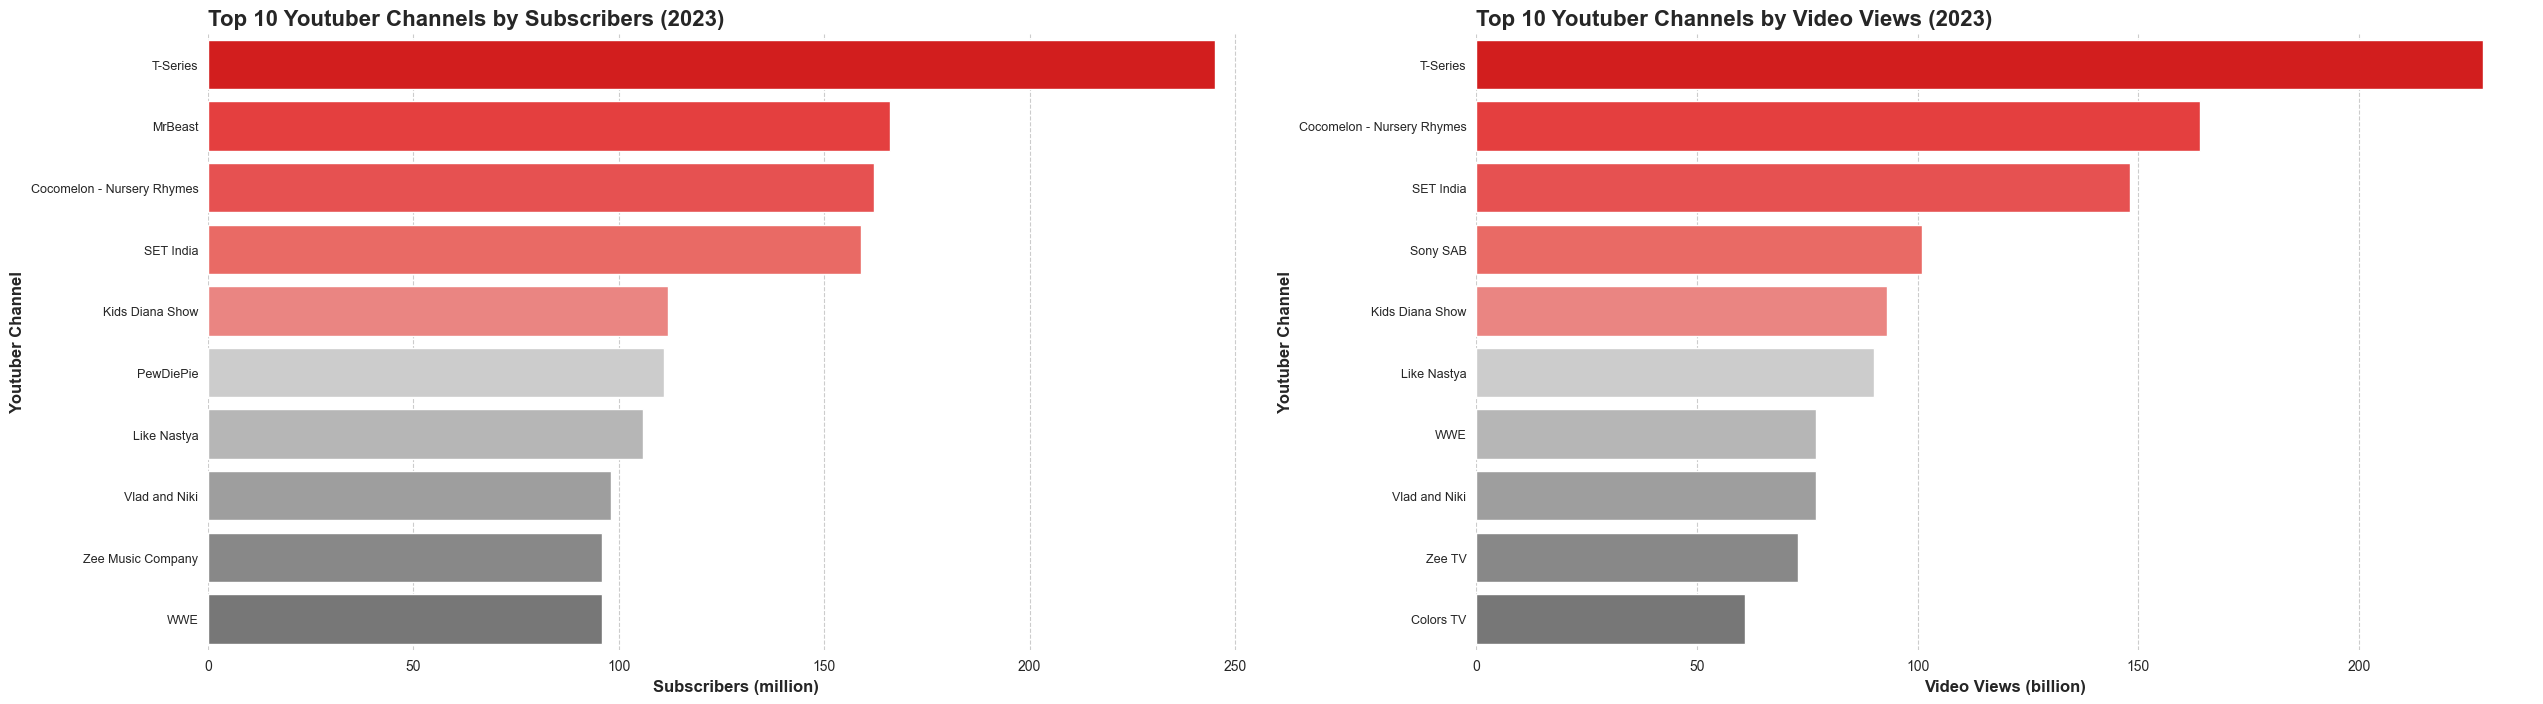

In [45]:
sb.set_style("whitegrid",{'axes.grid' : True})

fig, ax = plt.subplots(1, 2, figsize = (30,8))

sb.barplot(top_10_subs,x = 'Subscribers (million)' ,y = 'Youtuber', palette= youtube_color_barchart_10, ax = ax[0])
ax[0].set_title('Top 10 Youtuber Channels by Subscribers (2023)', loc = 'left',fontweight = 'heavy', fontsize = 16)
ax[0].set_xlabel('Subscribers (million)',fontweight = 'heavy', fontsize = 12)
ax[0].set_ylabel('Youtuber Channel',fontweight = 'heavy', fontsize = 12)
ax[0].grid(axis = 'x', linestyle ='--')
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['bottom'].set_visible(False)
ax[0].spines['left'].set_visible(False)
plt.sca(ax[0])
plt.yticks(size = 9)

sb.barplot(top_10_views,x = 'Video Views (billion)' ,y = 'Youtuber', palette= youtube_color_barchart_10, ax = ax[1]) 
ax[1].set_title('Top 10 Youtuber Channels by Video Views (2023)', loc = 'left',fontweight = 'heavy', fontsize = 16)
ax[1].set_xlabel('Video Views (billion)',fontweight = 'heavy', fontsize = 12)
ax[1].set_ylabel('Youtuber Channel',fontweight = 'heavy', fontsize = 12)
ax[1].grid(axis = 'x', linestyle ='--')
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['bottom'].set_visible(False)
ax[1].spines['left'].set_visible(False)
plt.sca(ax[1])
plt.yticks(size = 9)

plt.show();

*Observations:*
- Overall, looking at the bar charts, 7 out of the top 10 channels with the highest subscribers are also present in the top 10 channels with the highest video views.  
- There is not a significant change in the rankings when transitioning from Subscribers to Video Views, except for the channel 'T-Series,' which maintains the top position in both categories.  
=> Is there a correlation between the number of subscribers and views? Let's delve deeper into the relationship between these two variables in the next section.  


### *Task 2: Does a higher number of subscribers on a YouTube channel imply higher views?*  

#### *Correlation of Numeric Variables*

In [46]:
#Statistics table correlation 
correlation = youtube.corr()
correlation

Subscribers  Video Views   Uploads  \
Subscribers                                 1.000000     0.823659  0.087606   
Video Views                                 0.823659     1.000000  0.163997   
Uploads                                     0.087606     0.163997  1.000000   
Lowest Monthly Earnings                     0.427319     0.549752  0.164597   
Highest Monthly Earnings                    0.426945     0.549121  0.164955   
Gross Tertiary Education Enrollment (%)    -0.015456    -0.009473 -0.214767   
Unemployment Rate                          -0.023950     0.000665 -0.189159   
Population                                  0.083580     0.075701  0.139848   
Urban Population                            0.077677     0.072778  0.069912   
Created Year                               -0.132192    -0.137299 -0.163753   

                                         Lowest Monthly Earnings  \
Subscribers                                             0.427319   
Video Views                                             0.549752   
Uploads                                                 0.164597   
Lowest Monthly Earnings                                 1.000000   
Highest Monthly Earnings                                0.999955   
Gross Tertiary Education Enrollment (%)                -0.053732   
Unemployment Rate                                      -0.040113   
Population                                              0.096322   
Urban Population                                        0.074386   
Created Year                                            0.075421   

                                         Highest Monthly Earnings  \
Subscribers                                              0.426945   
Video Views                                              0.549121   
Uploads                                                  0.164955   
Lowest Monthly Earnings                                  0.999955   
Highest Monthly Earnings                                 1.000000   
Gross Tertiary Education Enrollment (%)                 -0.053519   
Unemployment Rate                                       -0.039891   
Population                                               0.096296   
Urban Population                                         0.074401   
Created Year                                             0.075385   

                                         Gross Tertiary Education Enrollment (%)  \
Subscribers                                                            -0.015456   
Video Views                                                            -0.009473   
Uploads                                                                -0.214767   
Lowest Monthly Earnings                                                -0.053732   
Highest Monthly Earnings                                               -0.053519   
Gross Tertiary Education Enrollment (%)                                 1.000000   
Unemployment Rate                                                       0.682986   
Population                                                             -0.571518   
Urban Population                                                       -0.296061   
Created Year                                                           -0.153923   

                                         Unemployment Rate  Population  \
Subscribers                                      -0.023950    0.083580   
Video Views                                       0.000665    0.075701   
Uploads                                          -0.189159    0.139848   
Lowest Monthly Earnings                          -0.040113    0.096322   
Highest Monthly Earnings                         -0.039891    0.096296   
Gross Tertiary Education Enrollment (%)           0.682986   -0.571518   
Unemployment Rate                                 1.000000   -0.225163   
Population                                       -0.225163    1.000000   
Urban Population                                  0.132932    0.910204 

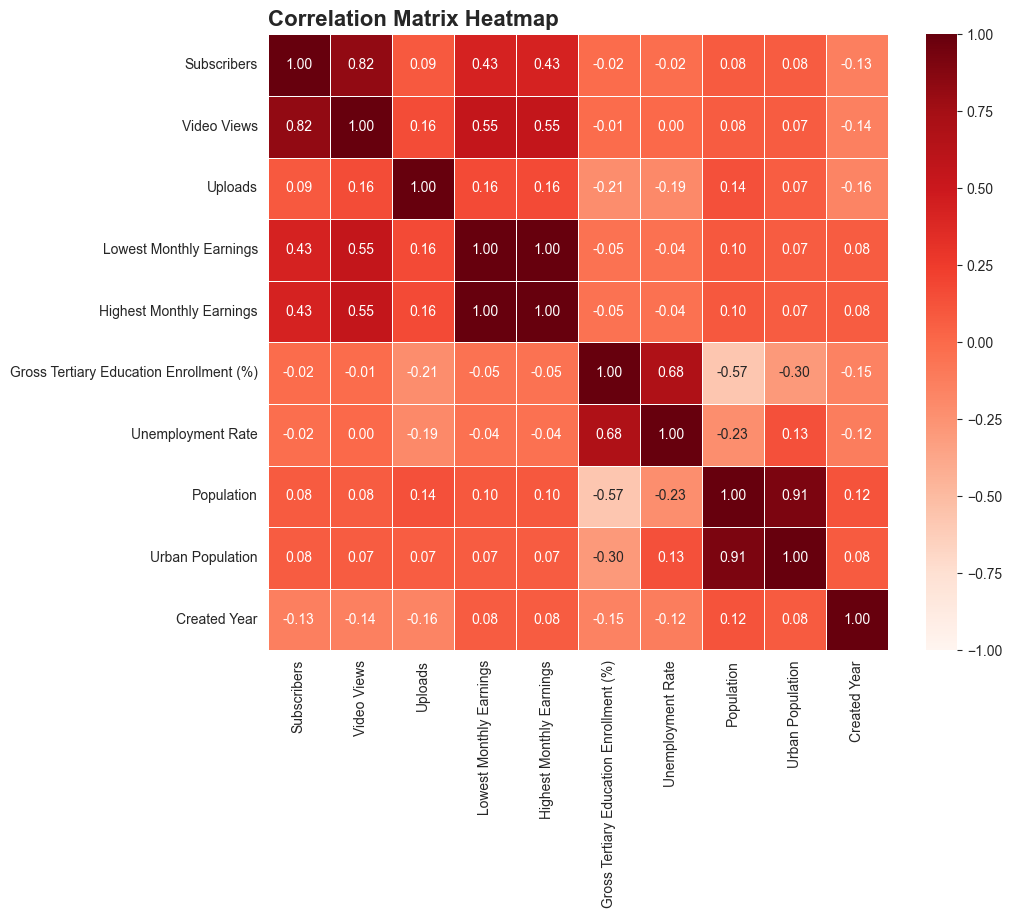

In [47]:
#Visualization heatmap

plt.figure(figsize= (10,8))
plt.title('Correlation Matrix Heatmap', loc = 'left', fontweight = 'heavy', fontsize = 16)
sb.heatmap(correlation, annot= True,
           cmap= 'Reds',
           vmin= -1, vmax= 1,
           linecolor = 'white', linewidths = 0.5,
           fmt = '.2f'
           )
plt.show()

*Observations:*
- The heatmap showing the correlation between continuous variables reveals a relatively high correlation between the variables `Subscribers` and `Video Views`.  
- The correlation of these two variables with the others is at a moderately weak level, with no correlation to the `Uploads` variable.  
- The variables `Lowest Monthly Earnings` and `Highest Monthly Earnings` show an absolute correlation of 100%.  
=> Let's explore the correlation of variables in more detail by visualizing it through scatter plots.  


In [48]:
#Statistics Subscriber (million), Video Views (billion) & Uploads (k.)

#Select columns to show output
select_columns = ['Youtuber', 'Subscribers', 'Video Views', 'Uploads']

#Filter dataframe by select_columns
youtube_corr_statistics = youtube[select_columns]

#Convert 'Subscriber' in millions
youtube_corr_statistics['Subscribers (million)'] = (youtube_corr_statistics['Subscribers'] / 1000000).astype('int')

#Convert 'Video Views' in millions
youtube_corr_statistics['Video Views (billion)'] = (youtube_corr_statistics['Video Views'] / 1000000000).astype('int')

#Convert 'Uploads' in thousand
youtube_corr_statistics['Uploads (k.)'] = (youtube_corr_statistics['Uploads'] / 1000)

youtube_corr_statistics = youtube_corr_statistics[['Youtuber', 'Subscribers (million)', 'Video Views (billion)', 'Uploads (k.)' ]]

#Show dataframe
youtube_corr_statistics.head()

Youtuber  Subscribers (million)  Video Views (billion)  \
0                    T-Series                    245                    228   
1                     MrBeast                    166                     28   
2  Cocomelon - Nursery Rhymes                    162                    164   
3                   SET India                    159                    148   
4             Kids Diana Show                    112                     93   

   Uploads (k.)  
0        20.082  
1         0.741  
2         0.966  
3       116.536  
4         1.111

In [49]:
youtube_corr_statistics['Video Views (billion)'].mean()

10.711180124223603

In [50]:
youtube_corr_statistics['Subscribers (million)'].mean()

22.27225672877847

In [51]:
per_subs = round(np.percentile(youtube_corr_statistics['Subscribers (million)'], 95))
per_views = round(np.percentile(youtube_corr_statistics['Video Views (billion)'], 95))

print('95% of YouTube channels have subscribers below:', per_subs, 'million')
print('95% of YouTube channels have video views below:', per_views, 'billion')

95% of YouTube channels have subscribers below: 46 million
95% of YouTube channels have video views below: 28 billion


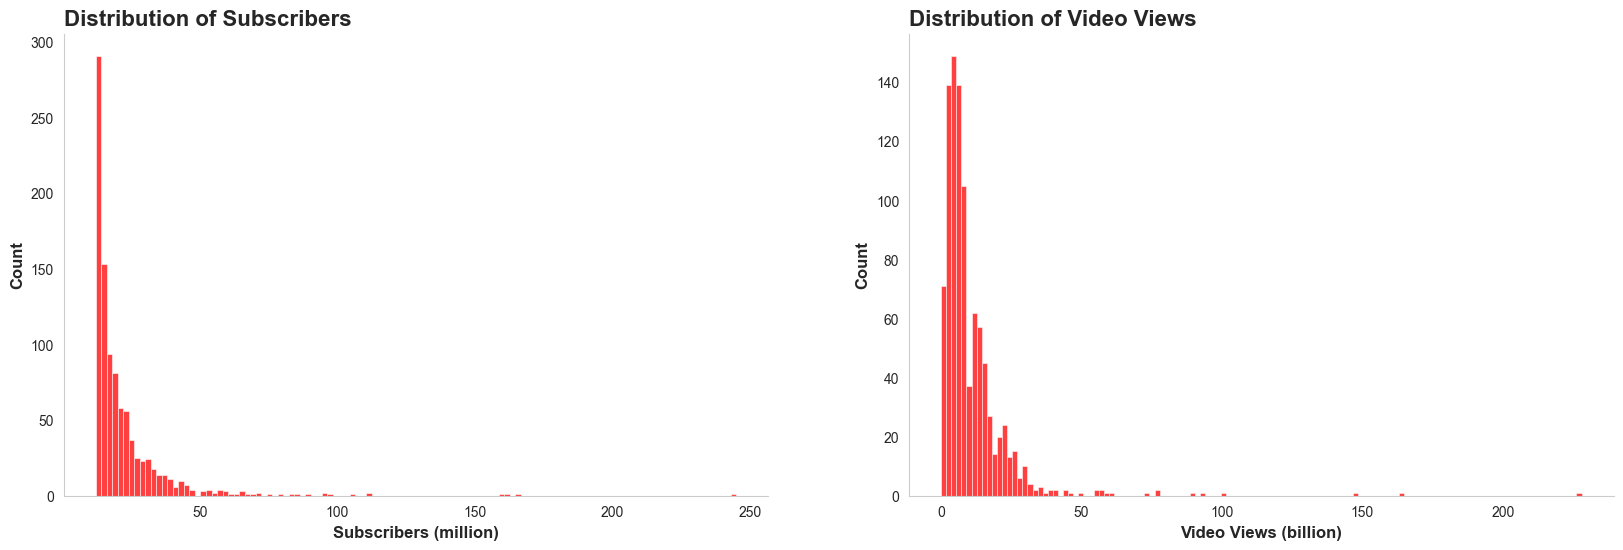

In [52]:
sb.set_style("whitegrid",{'axes.grid' : False})
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (20,6))
sb.histplot(youtube_corr_statistics['Subscribers (million)'], color= 'red',ax = ax1)
ax1.set_title('Distribution of Subscribers', loc = 'left', fontweight = 'heavy', fontsize = 16)
ax1.set_xlabel('Subscribers (million)', fontweight = 'heavy', fontsize = 12)
ax1.set_ylabel('Count', fontweight = 'heavy', fontsize = 12)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(True)
ax1.spines['left'].set_visible(True)

sb.histplot(youtube_corr_statistics['Video Views (billion)'], color= 'red', ax = ax2)
ax2.set_title('Distribution of Video Views', loc = 'left', fontweight = 'heavy', fontsize = 16)
ax2.set_xlabel('Video Views (billion)', fontweight = 'heavy', fontsize = 12)
ax2.set_ylabel('Count', fontweight = 'heavy', fontsize = 12)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_visible(True)
ax2.spines['left'].set_visible(True)

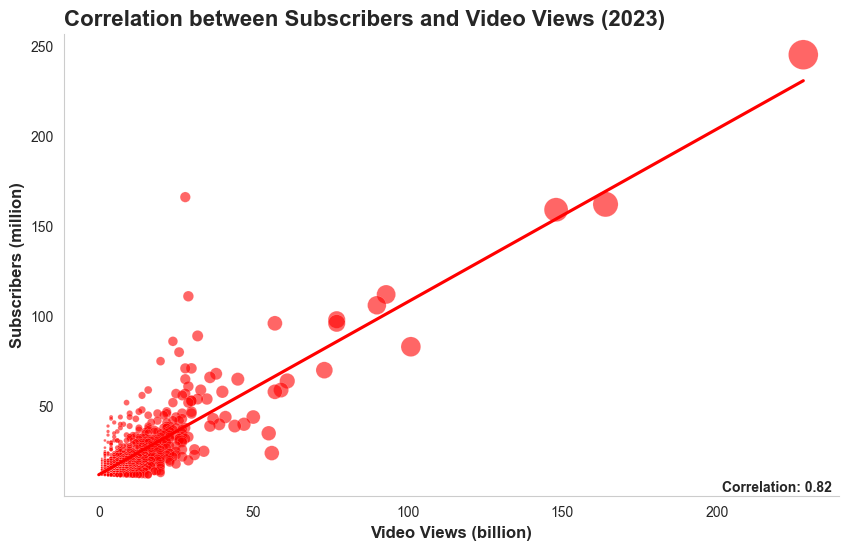

In [53]:
# Calculate the correlation coefficient
correlation = youtube_corr_statistics['Subscribers (million)'].corr(youtube_corr_statistics['Video Views (billion)'])

# Set scaling factor of circle size
scaling_factor = 2 

# Calculate the size of circles 
sizes = youtube_corr_statistics['Video Views (billion)'] * scaling_factor

# Chart
plt.figure(figsize= (10,6))
plt.title('Correlation between Subscribers and Video Views (2023)', loc = 'left', fontweight = 'heavy', fontsize = 16 )
sb.scatterplot(data= youtube_corr_statistics, x='Video Views (billion)', y='Subscribers (million)', color = 'red',alpha=0.6, s = sizes)
sb.regplot(data= youtube_corr_statistics,  x='Video Views (billion)', y='Subscribers (million)', scatter=False, ci=None,line_kws={"color": "red"})
plt.xlabel('Video Views (billion)', fontweight = 'heavy', fontsize = 12)
plt.ylabel('Subscribers (million)', fontweight = 'heavy', fontsize = 12)
# plt.grid(True, which = 'both', linestyle = '--', linewidth = 0.5)

sb.despine(left=False, bottom=False)
plt.grid(axis = 'y', linestyle ='')
# Note correlation
plt.annotate(f'Correlation: {correlation:.2f}', 
             xy = (0.85, 0.01), 
             xycoords = 'axes fraction', 
             fontsize = 10, 
             weight = 'bold')
plt.show()

*Observations:*  
- From the results of the top 10 in terms of subscribers and views with a correlation rate of up to 82%, the scatter plot illustrates the positive relationship between the two variables (a YouTube channel with more subscribers tends to have higher views).  
- Looking at the scatter plot, we see that the majority of data is concentrated in a considerably lower range compared to the previously mentioned top 10, with only a small fraction of channels having significantly higher subscribers and views.  
- Specifically, the histogram plot indicates that 95% of YouTube channels have fewer than 46 million subscribers and less than 28 billion views.  
=> This leads to the conclusion that:  
  - There is a significant dependency between the number of subscribers and views. Additionally, the figures indicate that only a few channels truly outperform the rest in terms of success (measured by Subscribers and Views).  
  - The question then arises: What factors contribute to the success of a YouTube channel?

### *Task 3: Does uploading more videos on a YouTube channel lead to an increase in subscribers and views?*

In [54]:
top_upload_channels = youtube[['Youtuber', 'Category', 'Uploads']].sort_values(by= 'Uploads', ascending= False).reset_index(drop= True).head(10)
top_upload_channels

Youtuber               Category  Uploads
0             ABP NEWS         People & Blogs   301308
1  GMA Integrated News        News & Politics   296272
2      TV9 Bharatvarsh         People & Blogs   293516
3              Aaj Tak        News & Politics   283775
4              IndiaTV        News & Politics   273255
5             KOMPASTV        News & Politics   269050
6      Thairath Online        News & Politics   244899
7              News 24        News & Politics   211620
8         ABS-CBN News        News & Politics   209520
9           TEDx Talks  Nonprofits & Activism   200933

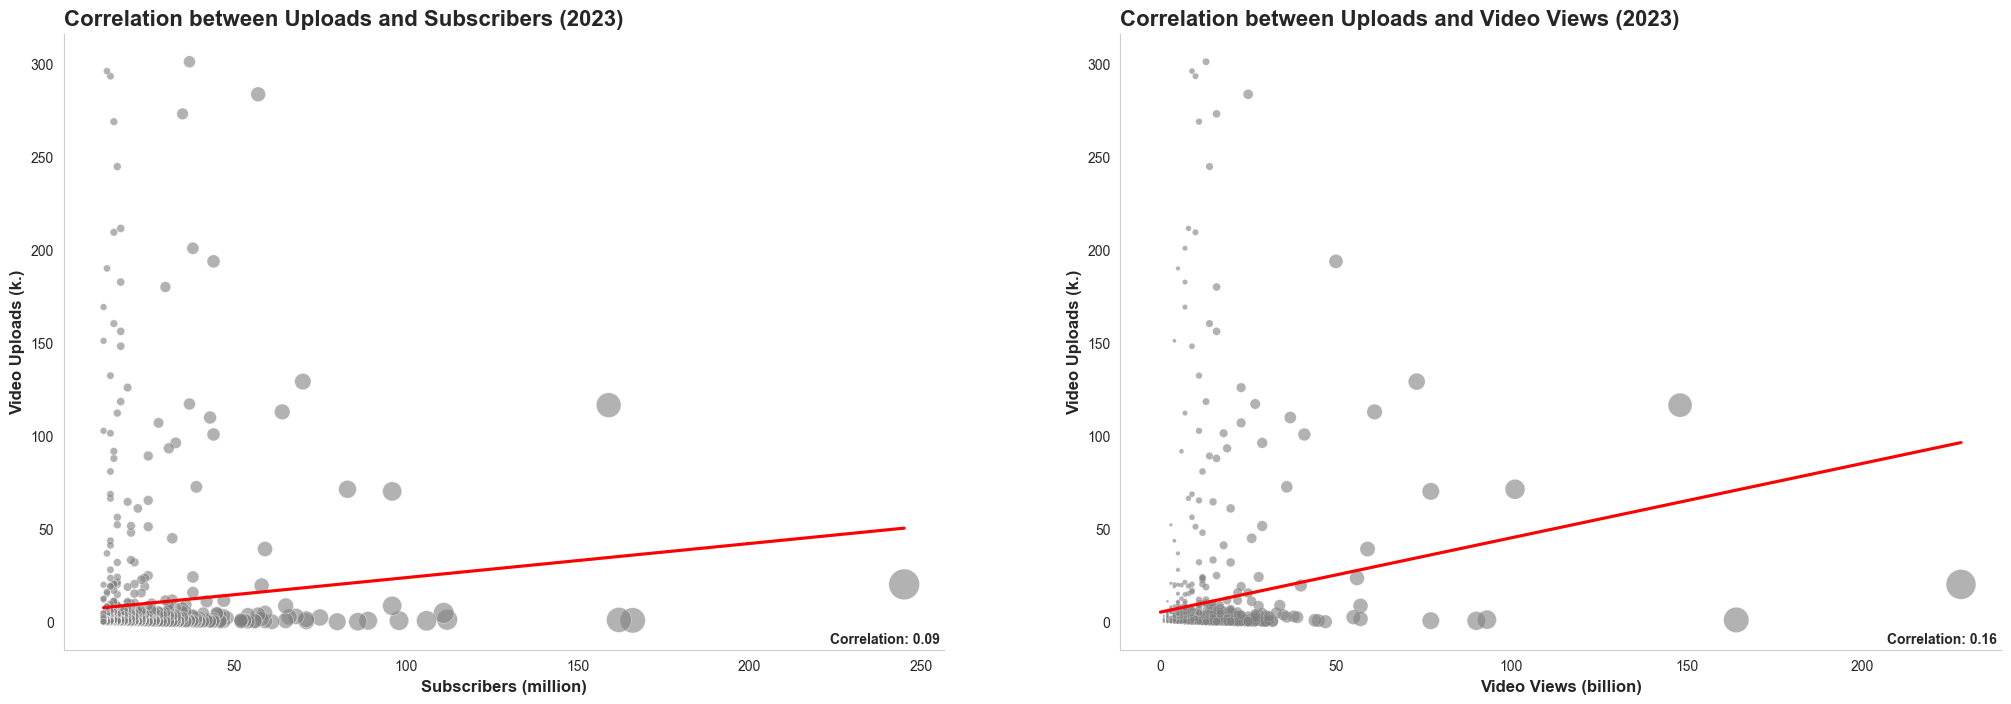

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [55]:
fig, ax = plt.subplots(1, 2, figsize = (25,8))

#Upload & Subscribers
# Calculate the correlation coefficient
correlation_ax0 = youtube_corr_statistics['Uploads (k.)'].corr(youtube_corr_statistics['Subscribers (million)'])
# Set scaling factor of circle size
scaling_factor_ax0 = 2 
# Calculate the size of circles 
sizes_ax0 = youtube_corr_statistics['Subscribers (million)'] * scaling_factor_ax0
# Chart
plt.figure(figsize= (10,6))
ax[0].set_title('Correlation between Uploads and Subscribers (2023)', loc = 'left', fontweight = 'heavy', fontsize = 16 )
sb.scatterplot(data= youtube_corr_statistics, x='Subscribers (million)', y='Uploads (k.)', color = 'gray',alpha=0.6, s = sizes_ax0, ax= ax[0])
sb.regplot(data= youtube_corr_statistics,  x='Subscribers (million)', y='Uploads (k.)', scatter=False, ci=None,line_kws={"color": "red"}, ax= ax[0])
ax[0].set_xlabel('Subscribers (million)', fontweight = 'heavy', fontsize = 12)
ax[0].set_ylabel('Video Uploads (k.)', fontweight = 'heavy', fontsize = 12)
ax[0].spines['top'].set_visible(False) 
ax[0].spines['right'].set_visible(False) 
ax[0].annotate(f'Correlation: {correlation_ax0:.2f}', 
             xy = (0.87, 0.01), 
             xycoords = 'axes fraction', 
             fontsize = 10, 
             weight = 'bold')

#Uploads & Video Views
# Calculate the correlation coefficient
correlation_ax1 = youtube_corr_statistics['Uploads (k.)'].corr(youtube_corr_statistics['Video Views (billion)'])
# Set scaling factor of circle size
scaling_factor_ax1 = 2 
# Calculate the size of circles 
sizes_ax1 = youtube_corr_statistics['Video Views (billion)'] * scaling_factor
# Chart
plt.figure(figsize= (10,6))
ax[1].set_title('Correlation between Uploads and Video Views (2023)', loc = 'left', fontweight = 'heavy', fontsize = 16 )
sb.scatterplot(data= youtube_corr_statistics, x='Video Views (billion)', y='Uploads (k.)', color = 'gray',alpha=0.6, s = sizes_ax1, ax= ax[1])
sb.regplot(data= youtube_corr_statistics,  x='Video Views (billion)', y='Uploads (k.)', scatter=False, ci=None,line_kws={"color": "red"}, ax= ax[1])
ax[1].set_xlabel('Video Views (billion)', fontweight = 'heavy', fontsize = 12)
ax[1].set_ylabel('Video Uploads (k.)', fontweight = 'heavy', fontsize = 12)
ax[1].annotate(f'Correlation: {correlation_ax1:.2f}', 
             xy = (0.87, 0.01), 
             xycoords = 'axes fraction', 
             fontsize = 10,          
             weight = 'bold')
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)

plt.show();

*Observations:*
- With extremely low correlation rates (0.9% and 17%) and inconsistent data dispersion, it can be concluded that a YouTube channel with many uploaded videos does not necessarily correlate with higher subscribers and views.
- This implies that the quality and content of videos may play a more crucial role in attracting subscribers and viewers rather than focusing solely on the quantity of uploaded videos.
- Additionally, an exception is indicated through the two scatter plots, showing a few channels that exhibit a unique contrast with very low subscribers and views but a significantly high number of uploaded videos. This could suggest the presence of a content category being heavily exploited by organizations with ample resources and long-term operations. It is reasonable to assume that these channels might belong to entertainment, news, or music genres known for uploading numerous short videos on a 24-hour cycle, such as news headlines or interview excerpts.  
=> So, which categories are being explored with high frequency?


### *Task 4: Which types of YouTube channels have the highest number of uploaded videos?*  

In [56]:
#Statistics by Category

#Group by lots of feature by Category
statis_category = youtube.groupby('Category').agg({'Category' : 'count',
                                                   'Uploads' : 'sum',
                                                   'Subscribers' : 'sum',
                                                   'Video Views' : 'sum'
                                                })
#Rename count feature
statis_category = statis_category.rename(columns= {'Category' : 'Count of Category'}).reset_index()

#Unit conversion
statis_category['Video Views (billion)'] = (statis_category['Video Views']/1000000000).astype('int')
statis_category['Subscribers (million)'] = (statis_category['Subscribers']/1000000).astype('int')
statis_category['Uploads (k.)'] = (statis_category['Uploads']/1000).astype('int')

#Select feature
statis_category = statis_category[['Category', 'Count of Category', 'Uploads (k.)','Subscribers (million)', 'Video Views (billion)']] #

#Show statistics table
statis_category

Category  Count of Category  Uploads (k.)  \
0        Autos & Vehicles                  2             3   
1                  Comedy                 69            77   
2               Education                 44           141   
3           Entertainment                235          2867   
4        Film & Animation                 44           127   
5                  Gaming                 92           403   
6           Howto & Style                 39            64   
7                  Movies                  2             7   
8                   Music                200           471   
9         News & Politics                 26          2924   
10  Nonprofits & Activism                  2           205   
11                  Other                 37            39   
12         People & Blogs                128          1212   
13         Pets & Animals                  4            17   
14   Science & Technology                 17            35   
15                  Shows                 11           354   
16                 Sports                 11           159   
17               Trailers                  2            13   
18        Travel & Events                  1             0   

    Subscribers (million)  Video Views (billion)  
0                      35                     15  
1                    1388                    550  
2                    1175                    691  
3                    5061                   2500  
4                    1101                    507  
5                    1928                    706  
6                     760                    194  
7                      51                     15  
8                    5155                   3103  
9                     536                    270  
10                     55                     10  
11                    669                    278  
12                   2720                   1251  
13                     72                     44  
14                    316                     66  
15                    512                    432  
16                    298                    147  
17                     78                     33  
18                     12                      3

In [57]:
#Select feature to to summary about Uploads
uploads_category = statis_category[['Category', 'Uploads (k.)']]

#Group features with counts under 300 into the general category other
uploads_category.loc[uploads_category['Uploads (k.)'] < 300, 'Category'] = 'Other'
uploads_category = uploads_category.groupby(['Category'])['Uploads (k.)'].sum().reset_index().sort_values(by = 'Uploads (k.)', ascending= False)

total = sum(uploads_category['Uploads (k.)'])
uploads_category['Percent Uploads (%)'] = [round((value / total) * 100,0) for value in uploads_category['Uploads (k.)']]
uploads_category.reset_index(drop= True, inplace= True)

#Show statistics table
uploads_category

Category  Uploads (k.)  Percent Uploads (%)
0  News & Politics          2924                 32.0
1    Entertainment          2867                 31.0
2   People & Blogs          1212                 13.0
3            Other           887                 10.0
4            Music           471                  5.0
5           Gaming           403                  4.0
6            Shows           354                  4.0

In [58]:
uploads_category = uploads_category.sort_values(by = 'Percent Uploads (%)',  ascending= True)

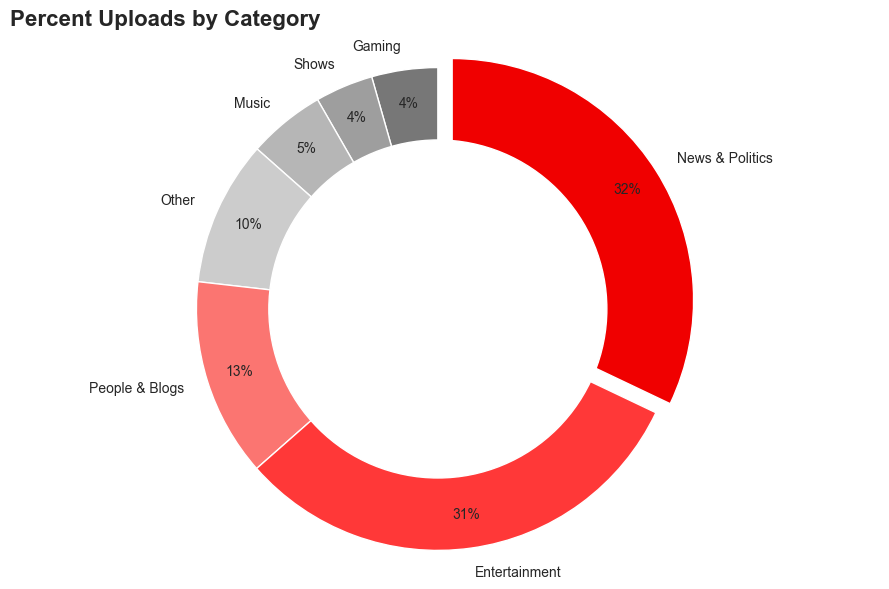

In [59]:
labels = uploads_category['Category']
sizes = uploads_category['Uploads (k.)']

explode = [0, 0, 0, 0, 0, 0, 0.07]
plt.figure(figsize= (9,6))
plt.pie(sizes, labels= labels,
        autopct='%1.0f%%',
        startangle=90,
        explode= explode,
        colors= youtube_color_donutchart,
        pctdistance=0.86)
# 
# plt.legend(title = 'Category',bbox_to_anchor=(1.1, 1), labels = labels)
plt.axis('equal')
plt.title('Percent Uploads by Category', loc = 'left', fontweight = 'heavy', fontsize = 16)
plt.tight_layout()

circle = plt.Circle(xy= (0,0), radius= .70, facecolor = 'white')
plt.gca().add_artist(circle)
plt.show();

*Observations:*  
It can be observed that the previous speculation is well-founded: Nearly two-thirds (63.5%) of the total uploads are evenly distributed between the News & Politics and Entertainment categories. Leading this distribution is the News & Politics category, accounting for 32.1% (2924K uploads) of the total uploaded videos (with a slight difference from the second position, Entertainment, at 31.4%). The remaining categories represent a very small percentage.  
`What makes the difference between these two categories compared to the others?`
- `News & Politics` is a category focused on uploading news and political videos, including news reports, documentaries, interviews, discussions, and other TV programs. Content in this category requires accuracy and constant updates, meaning it does not tend to generate repeat views of old news. In reality, these topics often require a large resource-backed team to exploit. This may be government-owned and managed organizations or high-profile departments influencing the public by providing useful information to viewers. This is one of the exceptions on YouTube where the number of uploaded videos is the highest without relying on views and subscriptions.
- In contrast, `Entertainment` is the leading entertainment category with diverse topics such as music, games, news-entertainment, movies-TV shows, etc. This is a category that can be explored by almost anyone, regardless of size, as it covers a wide range of topics. Channels in this category are often influenced by views and subscriptions, which are factors driving and sustaining the growth of channels built by individuals.
- Nowadays, with the increasing trend of short-form videos from platforms like TikTok, Instagram Reels, Facebook Short-form videos, YouTube also embraces this trend with `Short`. This model can generate many uploads in a short period while still attracting a modern audience. Influencers, KOLs, etc., who produce short videos with low budgets, ranging from 30 seconds to 1 minute, receive significant interactions from various platforms, including YouTube.  
=> So, is the high number of uploaded videos in these two categories due to many YouTubers exploring these categories?


### *Task 5: What is the distribution of YouTube channels in each category?*  

In [60]:
#Select features
count_category = statis_category[['Category', 'Count of Category']].sort_values(by = 'Count of Category', ascending= False).reset_index(drop = True)

# Group features with counts under 300 into the general category other
count_category.loc[count_category['Count of Category'] < 20, 'Category'] = 'Other'
count_category = count_category.groupby(['Category'])['Count of Category'].sum().reset_index().sort_values(by = 'Count of Category', ascending= False)


# total = sum(count_category['Count of Category'])
# count_category['Percent Category'] = [round((value / total) * 100,0) for value in count_category['Count of Category']]
count_category.reset_index(drop= True, inplace= True)

#Show statistics table
count_category

Category  Count of Category
0     Entertainment                235
1             Music                200
2    People & Blogs                128
3            Gaming                 92
4             Other                 89
5            Comedy                 69
6         Education                 44
7  Film & Animation                 44
8     Howto & Style                 39
9   News & Politics                 26

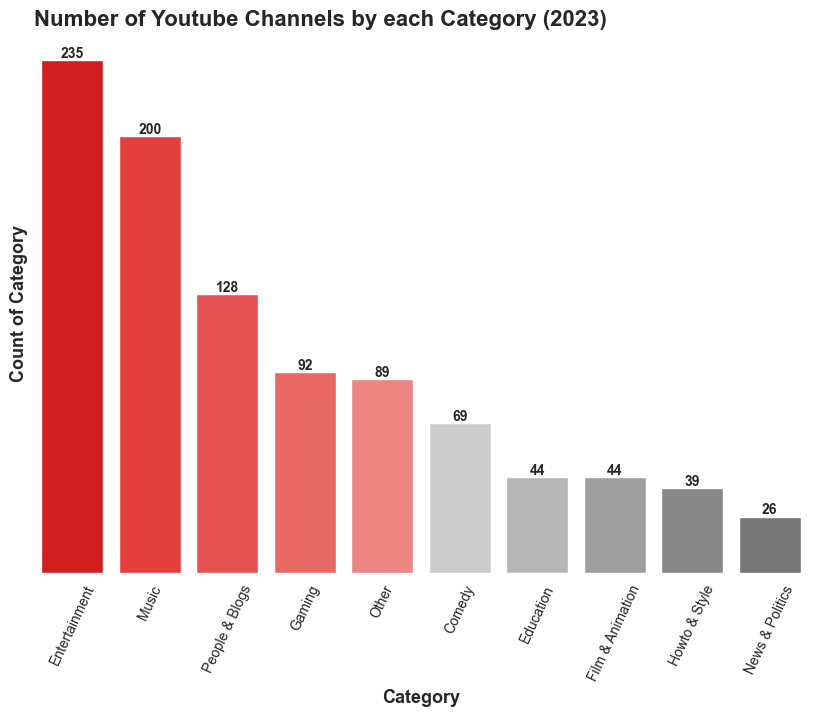

In [61]:
sb.set_style("whitegrid",{'axes.grid' : False})

plt.figure(figsize=(10,7))
# Select data for categoies and values feature
cnt_category = count_category['Count of Category'].to_list()

#Chart
plt.title('Number of Youtube Channels by each Category (2023)', loc = 'left', fontsize = 16, fontweight = 'heavy')
sb.barplot(data= count_category, x = 'Category', y = 'Count of Category', palette= youtube_color_barchart_10)

#Add number for each columns
for i, value in enumerate(cnt_category):
    plt.text(i, value + 1, cnt_category[i],  ha = 'center', fontsize=10, fontweight = 'heavy')

sb.despine(left=True, bottom=True)
plt.grid(axis = 'y', linestyle ='--')
plt.xlabel('Category', fontsize = 13, fontweight = 'heavy')
plt.ylabel('Count of Category', fontweight = 'heavy', fontsize = 13) 
plt.xticks(rotation = 65) 
plt.yticks([]) #loại bỏ các tham số trên trục y
plt.show();

*Observations:*  
- We can see that with just three categories, namely `Entertainment` (236 channels), `Music` (202 channels), and `People & Blogs` (129 channels), they account for nearly 60% of the total number of YouTube channels.   
- In the first position, as previously evidenced, the `Entertainment` category has the second-highest number of video uploads due to the diverse content that can be explored by any individual or organization. This is a "rich" category where anyone with creative ability can tap into the technological goldmine of the era, and it is also the most competitive category.  
- The diversity in music genres has created broad access opportunities for music creators. Alongside this is the popularity, ease of creation, and sharing with users through various forms such as covers, self-composed videos, or content related to their favorite music genres. These are the reasons why `Music` becomes the second-largest category in terms of the number of channels.  
- Notably, the `Education`, `Howto & Style`, and `News & Politics` categories all rank at the bottom. These are categories that convey useful content to viewers but have relatively limited channel numbers. Typical reasons, as mentioned earlier, include the case of `News & Politics` requiring significant resources to maintain and develop, coupled with strict content requirements and near-absolute accuracy, making it manageable only by a few organizations. Education and channels containing instructional content in a specific life domain require special knowledge capital along with experience in the field they want to convey. This somewhat limits the scope for those who have the ability to create, develop, and maintain a channel.  
=> So, beyond the mentioned reasons, is the concentration of the most successful channels in the `Entertainment`, `Music`, and `People & Blogs` categories primarily due to diversity, popularity, or the ease of exploiting content by anyone? Or is this also a user trend on YouTube?

### *Task 6: User trends on YouTube based on subscribers and views in each category.*

In [62]:
sub_youtuber_cate = youtube[['Youtuber', 'Category', 'Subscribers']].sort_values(by = 'Subscribers', ascending= False).reset_index(drop = True).head(10)
sub_youtuber_cate

Youtuber        Category  Subscribers
0                    T-Series           Music    245000000
1                     MrBeast   Entertainment    166000000
2  Cocomelon - Nursery Rhymes       Education    162000000
3                   SET India           Shows    159000000
4             Kids Diana Show  People & Blogs    112000000
5                   PewDiePie          Gaming    111000000
6                 Like Nastya  People & Blogs    106000000
7               Vlad and Niki   Entertainment     98900000
8           Zee Music Company           Music     96700000
9                         WWE          Sports     96000000

In [63]:
#Select feature for subscribers chart
subs_category = statis_category[['Category', 'Subscribers (million)']].sort_values(by= 'Subscribers (million)', ascending= False).reset_index(drop= True)
subs_category['Percent (%)'] = round((subs_category['Subscribers (million)'] / sum(subs_category['Subscribers (million)'])) *100,0)
subs_category

Category  Subscribers (million)  Percent (%)
0                   Music                   5155         24.0
1           Entertainment                   5061         23.0
2          People & Blogs                   2720         12.0
3                  Gaming                   1928          9.0
4                  Comedy                   1388          6.0
5               Education                   1175          5.0
6        Film & Animation                   1101          5.0
7           Howto & Style                    760          3.0
8                   Other                    669          3.0
9         News & Politics                    536          2.0
10                  Shows                    512          2.0
11   Science & Technology                    316          1.0
12                 Sports                    298          1.0
13               Trailers                     78          0.0
14         Pets & Animals                     72          0.0
15  Nonprofits & Activism                     55          0.0
16                 Movies                     51          0.0
17       Autos & Vehicles                     35          0.0
18        Travel & Events                     12          0.0

In [64]:
view_youtuber_cate = youtube[['Youtuber', 'Category', 'Video Views']].sort_values(by = 'Video Views', ascending= False).reset_index(drop = True).head(10)
view_youtuber_cate

Youtuber        Category   Video Views
0                    T-Series           Music  228000000000
1  Cocomelon - Nursery Rhymes       Education  164000000000
2                   SET India           Shows  148000000000
3                    Sony SAB           Shows  101000000000
4             Kids Diana Show  People & Blogs   93247040539
5                 Like Nastya  People & Blogs   90479060027
6                         WWE          Sports   77428473662
7               Vlad and Niki   Entertainment   77180169894
8                      Zee TV   Entertainment   73139054467
9                   Colors TV           Shows   61510906457

In [65]:
#Select feature for views chart
views_category = statis_category[['Category', 'Video Views (billion)']].sort_values(by= 'Video Views (billion)', ascending= False).reset_index(drop= True)
views_category['Percent (%)'] = round((views_category['Video Views (billion)'] / sum(views_category['Video Views (billion)']))*100,0)
views_category

Category  Video Views (billion)  Percent (%)
0                   Music                   3103         29.0
1           Entertainment                   2500         23.0
2          People & Blogs                   1251         12.0
3                  Gaming                    706          7.0
4               Education                    691          6.0
5                  Comedy                    550          5.0
6        Film & Animation                    507          5.0
7                   Shows                    432          4.0
8                   Other                    278          3.0
9         News & Politics                    270          2.0
10          Howto & Style                    194          2.0
11                 Sports                    147          1.0
12   Science & Technology                     66          1.0
13         Pets & Animals                     44          0.0
14               Trailers                     33          0.0
15       Autos & Vehicles                     15          0.0
16                 Movies                     15          0.0
17  Nonprofits & Activism                     10          0.0
18        Travel & Events                      3          0.0

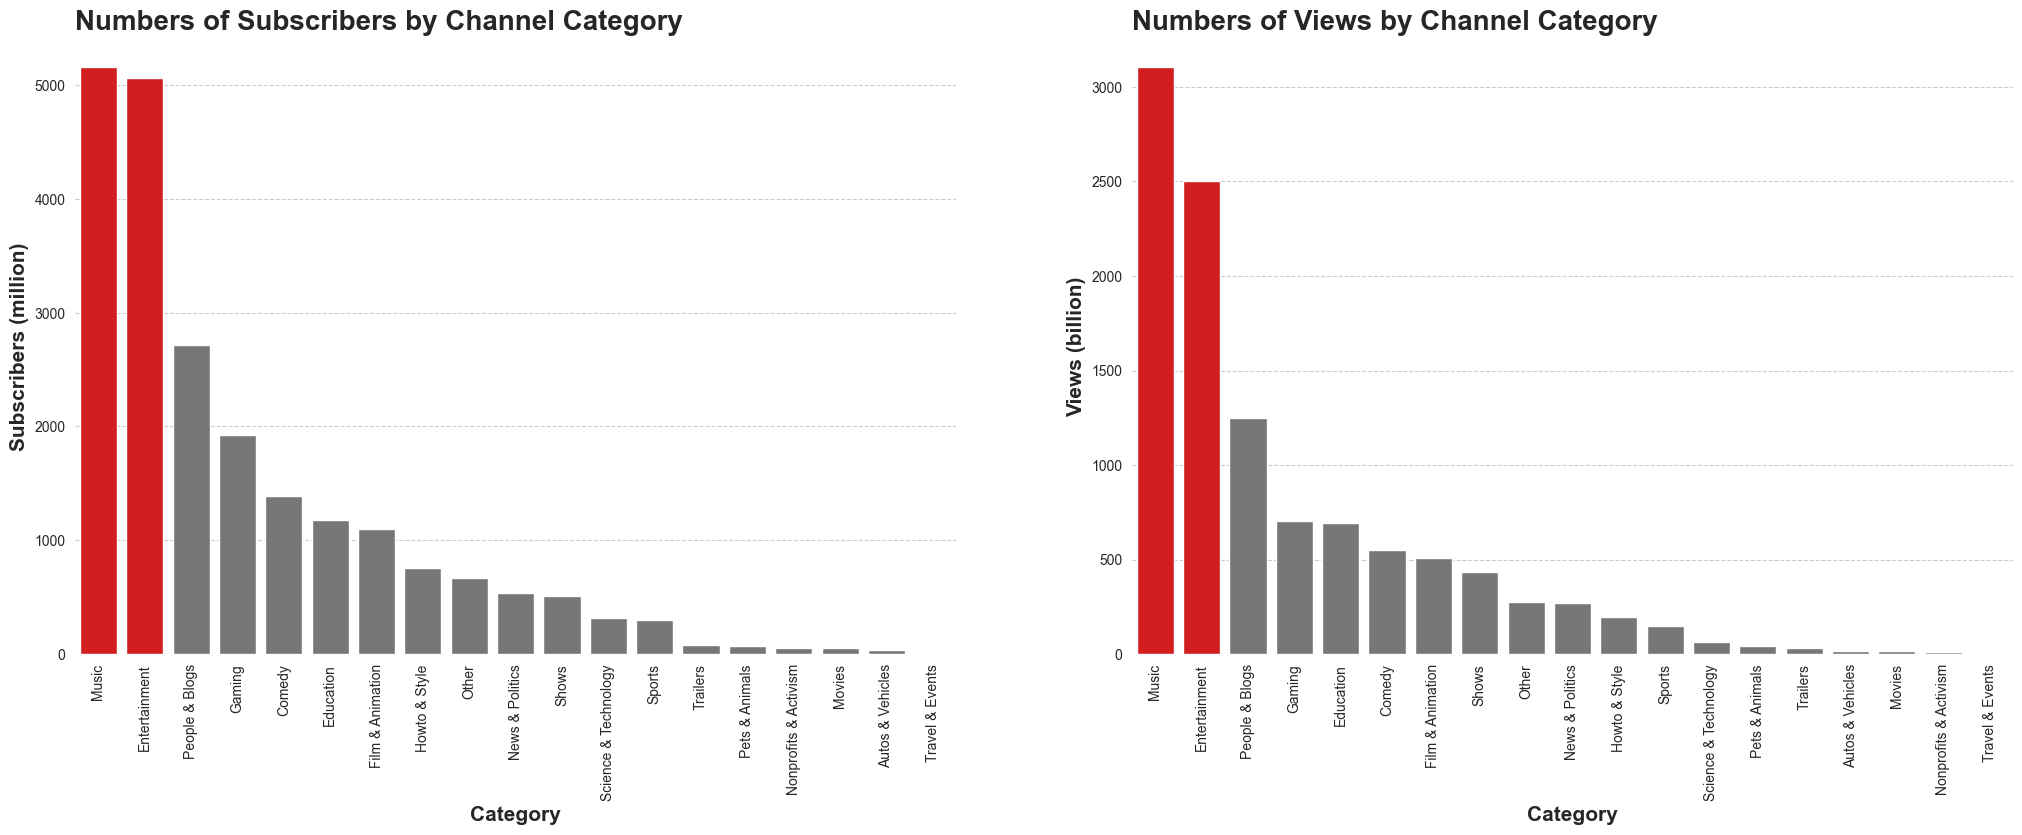

In [66]:
sb.set_style("whitegrid",{'axes.grid' : True})

fig, ax = plt.subplots(1, 2, figsize = (25,8))

#Subscribers chart
sb.barplot(data= subs_category, x= 'Category', y = 'Subscribers (million)', ax= ax[0], palette = youtube_color_barchart_freestyle1) 
ax[0].set_title('Numbers of Subscribers by Channel Category ', loc = 'left', fontweight = 'heavy', fontsize = 20)
ax[0].set_ylabel('Subscribers (million)', fontsize = 15, fontweight = 'heavy')
ax[0].set_xlabel('Category',  fontsize = 15, fontweight = 'heavy')
ax[0].grid(axis = 'y', linestyle ='--')
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['bottom'].set_visible(False)
ax[0].spines['left'].set_visible(False)
plt.sca(ax[0])
plt.xticks(rotation = 90)

#Views chart
sb.barplot(data= views_category, x= 'Category', y = 'Video Views (billion)', ax= ax[1], palette = youtube_color_barchart_freestyle1)
ax[1].set_title('Numbers of Views by Channel Category ', loc = 'left', fontweight = 'heavy', fontsize = 20)
ax[1].set_ylabel('Views (billion)',  fontsize = 15, fontweight = 'heavy')
ax[1].set_xlabel('Category',  fontsize = 15, fontweight = 'heavy')
ax[1].grid(axis = 'y', linestyle ='--')
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['bottom'].set_visible(False)
ax[1].spines['left'].set_visible(False)
plt.sca(ax[1])
plt.xticks(rotation = 90)

plt.show();

*Observations:*  
- With only two categories, `Music` and `Entertainment`, they account for 47% of the total subscribers and 52% of the total views compared to the overall dataset.
- Among them, the `Music` category leads in both main metrics with approximately 5.2 billion subscribers and over 3100 billion views.
- In general, both are entertainment-oriented categories across all platforms, and on YouTube, they are even more amplified. These figures give us a comprehensive view of user trends on YouTube.
  - `Music`
    - Global popularity: Music is a universal language, and people worldwide love and seek music on YouTube.
    - Famous artists: Many famous artists use YouTube to share their music, attracting significant attention from fans and viewers.
    - High quality: Music videos often have high quality, including visuals and sound, providing a good experience for viewers.
  - `Entertainment`
    - Diverse entertainment content: The "Entertainment" category on YouTube includes various types of entertainment content, from personal vlogs, funny videos to challenges, gaming, movie reviews, and other content.
    - Creativity: Entertainment content is often very diverse, fostering creative freedom for many individual YouTube channels.
- Both categories provide viewers with a way to entertain, relax, and learn about their interests, especially in the digital age when everything is changing rapidly, making human entertainment needs a top priority. This makes them the two most popular categories on YouTube.


### *Task 7: How do users interact in these categories (measured by views per subscriber)?*  

In [67]:
#Group subscribers and video views by categories
subs_views_category = youtube.groupby('Category').agg({'Subscribers' : 'sum',
                                                      'Video Views' : 'sum'})

#Create View-to-Subscriber Ratio 
subs_views_category['View-to-Subscriber Ratio'] = (subs_views_category['Video Views'] / subs_views_category['Subscribers']).astype('int')
subs_views_category.sort_values(by= 'View-to-Subscriber Ratio', ascending= False, inplace= True)
subs_views_category.reset_index( inplace= True)

#Show statistics table
subs_views_category

Category  Subscribers    Video Views  \
0                   Shows    512600000   432356612140   
1          Pets & Animals     72400000    44866745899   
2                   Music   5155300000  3103516219048   
3               Education   1175400000   691690418531   
4         News & Politics    536400000   270391919347   
5                  Sports    298200000   147986290620   
6           Entertainment   5061400000  2500154780534   
7        Film & Animation   1101700000   507963782337   
8          People & Blogs   2720900000  1251773521276   
9                Trailers     78000000    33262717607   
10       Autos & Vehicles     35700000    15003458141   
11                  Other    669400000   278191674947   
12                 Comedy   1388500000   550112774315   
13                 Gaming   1928500000   706166809255   
14                 Movies     51300000    15383255129   
15          Howto & Style    760800000   194799530478   
16        Travel & Events     12500000     3140883140   
17   Science & Technology    316500000    66976747110   
18  Nonprofits & Activism     55500000    10862911785   

    View-to-Subscriber Ratio  
0                        843  
1                        619  
2                        602  
3                        588  
4                        504  
5                        496  
6                        493  
7                        461  
8                        460  
9                        426  
10                       420  
11                       415  
12                       396  
13                       366  
14                       299  
15                       256  
16                       251  
17                       211  
18                       195

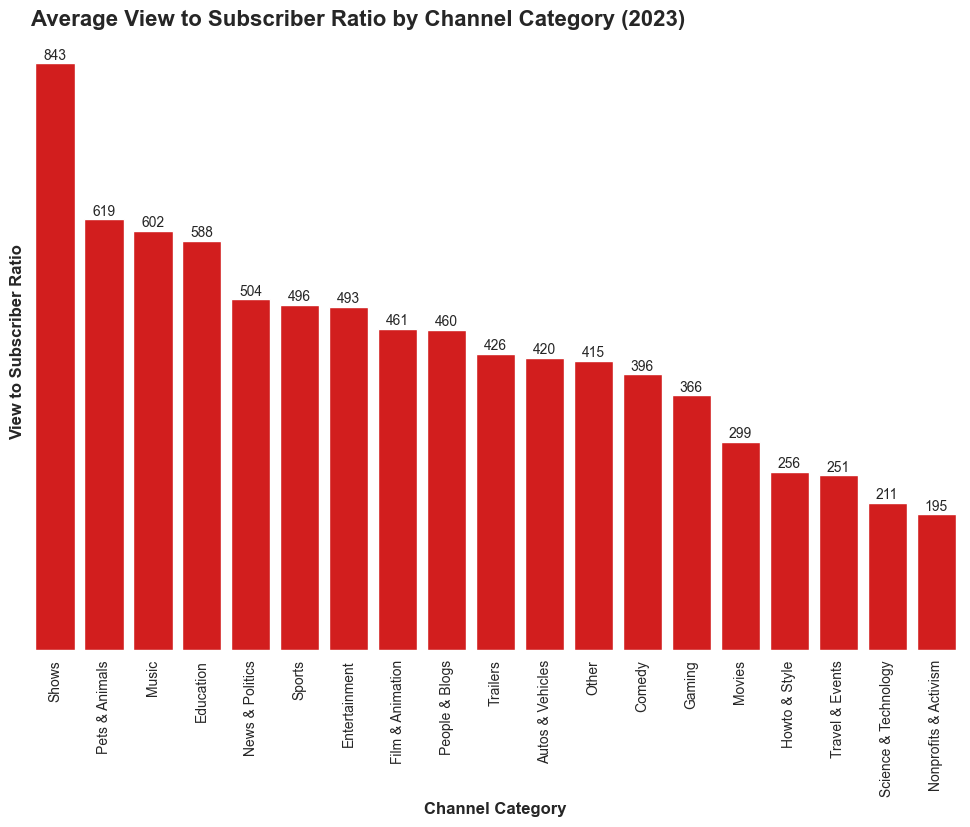

In [68]:
sb.set_style("whitegrid",{'axes.grid' : False})
plt.figure(figsize= (12,8))

#Convert variable to a list
labels = subs_views_category['View-to-Subscriber Ratio'].to_list()

#Chart
plt.title('Average View to Subscriber Ratio by Channel Category (2023)', loc = 'left', fontweight = 'heavy', fontsize = 16)
sb.barplot(data= subs_views_category, x = 'Category', y = 'View-to-Subscriber Ratio', color = '#f00000') #palette= youtube_color_a
plt.xlabel('Channel Category', fontsize = 12, fontweight = 'heavy')
plt.ylabel('View to Subscriber Ratio', fontsize = 12, fontweight = 'heavy')

#Add label for each columns in chart
for i, value in enumerate(labels):
    plt.text(i, value + 6, labels[i],  ha = 'center', fontsize=10)
    
sb.despine(left=True, bottom=True)
plt.xticks(rotation = 90)
plt.yticks([])
plt.show();

In [69]:
print('Average views per subscriber for all categories:',round(subs_views_category['View-to-Subscriber Ratio'].mean(),0))

Average views per subscriber for all categories: 437.0


*Observations:*  
- The `Show` category leads with a higher average view rate over 27% compared to the adjacent `Pets & Animals` category. This is a surprising finding since this category previously had a very modest number of subscribers and views (512 million subscribers and 432 billion views).
- Meanwhile, the two categories leading the user trends on YouTube have relatively average views per subscriber, with 602 for `Music` and 493 for `Entertainment`.
- A high view-to-subscriber ratio indicates:
  - A loyal fan group: Subscribers regularly return to watch when new content is uploaded, demonstrating a strong connection between content creators and the audience.
  - High-quality content group attracting high interaction: Interesting and engaging content, keeping up with trends over time, gives subscribers a positive feeling, leading to frequent content viewing, the possibility of re-watching videos, resulting in more views per subscriber.
- Compared to categories with a low view-to-subscriber ratio, there may be some reasons for this:
  - Viral content group: Channels with a few viral videos bring in a large number of views at a given time but fail to maintain this throughout all uploaded videos on the channel, thus not converting views into subscribers.
  - Broadly appealing content: Widely appealing content is often shared or uploaded on multiple platforms other than YouTube, attracting views from those who just browse without actually wanting to subscribe.
  - Search-friendly content: Channels creating content that answers common questions like `Howto & Style`, `Travel & Events`, `Science & Technology`, or addressing popular topics help these videos have a high chance of being discovered through searches on YouTube or Google. However, after getting the answers or information they need, viewers may not feel the need to subscribe.


### *Task 8: Does the content (characters) in the names of YouTube channels influence user views?*

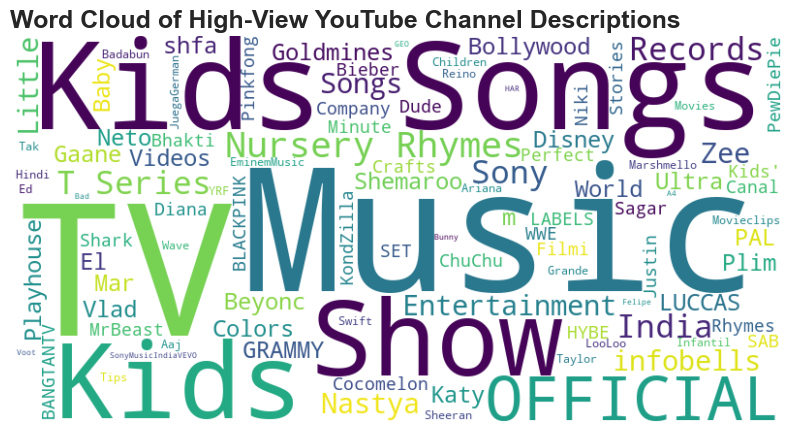

In [70]:
# Determine the 75th percentile of video views
percentile_75th = youtube['Video Views'].quantile(0.75)

# Filter channels with views above the 75th percentile
high_view_channels = youtube[youtube['Video Views'] > percentile_75th]

# Combine the names of high-view channels into a single string
text = ' '.join(high_view_channels['Youtuber'])

# Create the word cloud
wordcloud = WordCloud(background_color = 'white', width = 800, height = 400, max_words= 100).generate(text)

# Plot the word cloud
plt.figure(figsize= (10,8))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.title('Word Cloud of High-View YouTube Channel Descriptions', loc = 'left', fontsize = 18, fontweight = 'heavy')
plt.show()

*Observations:*  
- The most prominent words in the Word Cloud chart above, such as `Music`, `Kids`, `Songs`, `Entertainment`, `Nursery Rhymes`, and `Record`, are highly related to the user trends in YouTube categories as presented in the previous analyses, such as `Music`, `Entertainment`, and `Shows`.
- The close correlation between characters in YouTube channel names and channel categories may be due to several reasons:
  - Clear branding: Content creators often want their channel name to reflect the type of content they produce. This helps potential users easily understand the focus of the channel. A name that aligns well with the content enhances brand clarity and helps set audience expectations.
  - Recognizability: Channels with keywords in their names that also match the keywords in channel categories may help improve the channel's visibility in search results.
  - Consistency between name and content: If the channel name directly correlates with the category name, the channel will provide a consistent experience for viewers. For example, a channel named `Action Movies` in the `Movies` category will align with what users expect through the name.


### *Task 9: Which countries do the top YouTubers come from? (Distribution of YouTube Channels by Country (2023))*

In [71]:
map_chart = youtube.groupby(['Country','Abbreviation'])[['Youtuber']].count().reset_index().rename(columns={'Youtuber':'Count of Country'}).sort_values(by= 'Count of Country', ascending= False)
map_chart.reset_index(drop = True, inplace= True)

map_chart['Percent'] = round((map_chart['Count of Country'] / sum(map_chart['Count of Country']))*100,1)
map_chart

Country Abbreviation  Count of Country  Percent
0          United States           US               306     31.7
1                  India           IN               168     17.4
2                  Other        Other               113     11.7
3                 Brazil           BR                61      6.3
4         United Kingdom           GB                43      4.5
5                 Mexico           MX                33      3.4
6              Indonesia           ID                28      2.9
7                  Spain           ES                22      2.3
8               Thailand           TH                18      1.9
9            South Korea           KR                16      1.7
10                Canada           CA                15      1.6
11             Argentina           AR                13      1.3
12           Philippines           PH                12      1.2
13                Russia           RU                11      1.1
14              Colombia           CO                11      1.1
15             Australia           AU                 8      0.8
16          Saudi Arabia           SA                 7      0.7
17  United Arab Emirates           AE                 7      0.7
18              Pakistan           PK                 6      0.6
19               Germany           DE                 6      0.6
20                 Japan           JP                 5      0.5
21               Ukraine           UA                 5      0.5
22                France           FR                 5      0.5
23                Turkey           TR                 4      0.4
24                Sweden           SE                 4      0.4
25           Netherlands           NL                 3      0.3
26               Vietnam           VN                 3      0.3
27                Jordan           JO                 3      0.3
28                 Chile           CL                 3      0.3
29             Singapore           SG                 3      0.3
30                 Italy           IT                 2      0.2
31                  Iraq           IQ                 2      0.2
32                 Egypt           EG                 2      0.2
33               Ecuador           EC                 2      0.2
34           Switzerland           CH                 1      0.1
35             Venezuela           VE                 1      0.1
36           Afghanistan           AF                 1      0.1
37                 Samoa           WS                 1      0.1
38                  Peru           PE                 1      0.1
39               Morocco           MA                 1      0.1
40              Malaysia           MY                 1      0.1
41               Andorra           AD                 1      0.1
42                Kuwait           KW                 1      0.1
43               Finland           FI                 1      0.1
44           El Salvador           SV                 1      0.1
45                  Cuba           CU                 1      0.1
46                 China           CN                 1      0.1
47              Barbados           BB                 1      0.1
48            Bangladesh           BD                 1      0.1
49                Latvia           LV                 1      0.1

In [72]:
import plotly.graph_objs as go 
import plotly.express as px
custom_colorscale = [
    [0, "#115f9a"],
    [0.05, "#1984c5"],
    [0.1, "#22a7f0"],
    [0.2, "#48b5c4"],
    [0.4, "#76c68f"],
    [0.6, "#a6d75b"],
    [0.7, "#c9e52f"],
    [0.8, "#d0ee11"],
    [1, "#f4f100"]
]

# Create the choropleth map with the custom colorscale
fig = px.choropleth(map_chart, 
                    locations='Country',
                     
                    locationmode='country names',
                    color='Count of Country',
                    color_continuous_scale=custom_colorscale,
                    hover_name='Country',
                    title='Distribuiton of Channels per Country', 
                    projection='equirectangular')


# Customize the colorbar title
fig.update_coloraxes(colorbar_title= 'Count of Country')

fig.update_layout(
    title = dict(text = "Distribuiton of Channels per Country", x = 0.3),
    title_font = dict(size = 18),
    height = 630,
    width = 1100

)

# fig.update_geos(
    # 
    # showcountries = True
# )
fig.update_layout(
    geo=dict(
        showcoastlines=True,
        coastlinecolor="Black",
        showland=True,
        landcolor="LightGray",
        showocean=True,
        oceancolor="LightBlue"
    ))

scattergeo_trace = go.Scattergeo(
    locationmode='country names',
    locations=map_chart['Country'], 
    text=map_chart['Abbreviation'],  
    mode='text',  
    showlegend=False, 
    textfont=dict(size=7, color='black', family='Arial')  
)


fig.add_trace(scattergeo_trace)


*Observations:*  
*An interesting part of this dataset is the presence of up to 11% of channels with missing data on specific countries. The lack of this data collection may have a relatively significant impact on the number of channels in the top countries.*
- The United States and India lead the global ranking of top YouTube channels in 2023, accounting for approximately 50% of the total channels in this dataset. In this regard, the United States holds the highest position with 32%, equivalent to 306 channels, followed by India with 17%, corresponding to 168 channels.
- Both are countries with large populations and strong development in the media industry. With Hollywood in the United States and Bollywood in India being the world's top film capitals, many creators have turned to YouTube to share entertainment content.  
=> So, what makes the United States superior to other countries in terms of the number of successful YouTube channels? Let's explore this through some characteristics of the data for each country in this dataset.

#### *9.1. Unemployment rate in each country.*

In [73]:
#Select data for 'Unemployment Rate by Country chart'
unempl_rate = youtube[['Country', 'Unemployment Rate']].sort_values(by= 'Unemployment Rate', ascending= False).reset_index(drop= True)
unempl_rate = unempl_rate.drop_duplicates().reset_index(drop= True)
unempl_rate.head()

Country  Unemployment Rate
0         Jordan              14.72
1  United States              14.70
2          Spain              13.96
3         Turkey              13.49
4           Iraq              12.82

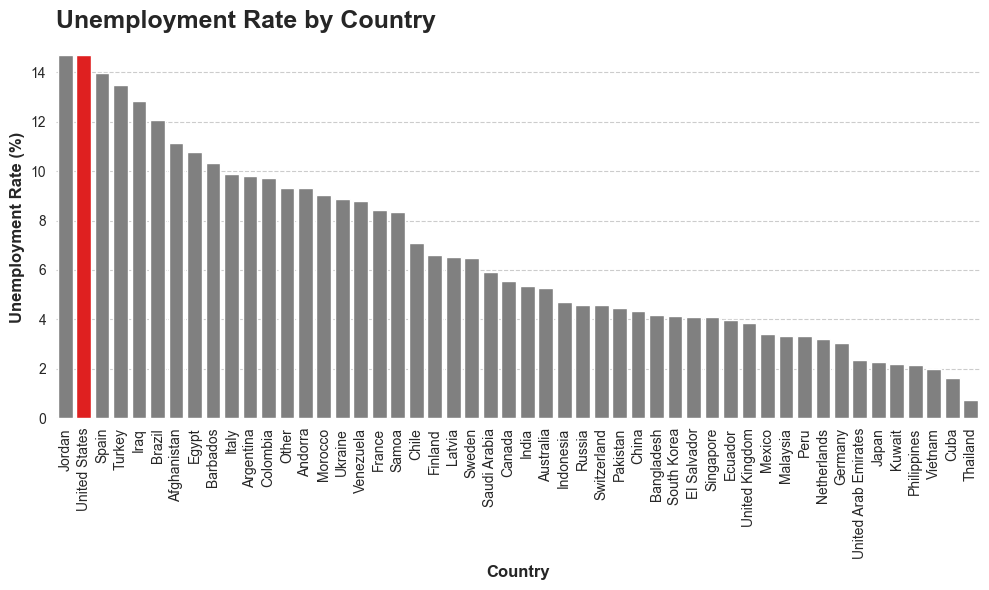

In [74]:
#Setup color for Unemployment Rate (%) chart
unempl_colors = []
for i in range(len(unempl_rate['Country'])):
    if unempl_rate['Country'][i] == 'United States':
        unempl_colors.append('red')
    else:
        unempl_colors.append('gray')
#Chart
plt.figure(figsize  = (10,6))
sb.barplot(data = unempl_rate, x = 'Country', y = 'Unemployment Rate', palette= unempl_colors)
plt.title('Unemployment Rate by Country', loc = 'left', fontweight = 'heavy', fontsize = 18)
plt.xlabel('Country', fontweight = 'heavy', fontsize = 12)
plt.ylabel('Unemployment Rate (%)', fontweight = 'heavy', fontsize = 12)
plt.xticks(rotation = 90)
sb.despine(left=True, bottom=True)
plt.grid(axis = 'y', linestyle ='--')
plt.tight_layout()
plt.show();

**The Impact of Unemployment Rate on the Success of YouTube Channels:**
- `Content Innovation:` YouTube provides an opportunity for unemployed individuals with high creative potential to carve out a new path, thereby improving their lives. Those with creative abilities will have more time to focus on developing content and their channels during periods of job instability.
- `Demand for Educational and Career-Related Content:` During unemployment, there is a growing trend in content related to education, job searching, and career development. Content creators can capitalize on these trends to help viewers learn about writing resumes, interviews, or honing professional skills.


#### *9.2. University enrollment rate in each country.*

In [75]:
#Select data for 'Gross Tertiary Education Enrollment Rate by Country chart'
education_rate = youtube[['Country', 'Gross Tertiary Education Enrollment (%)']].sort_values(by= 'Gross Tertiary Education Enrollment (%)', ascending= False).reset_index(drop= True)
education_rate = education_rate.drop_duplicates().reset_index(drop= True)
education_rate.head(10)

Country  Gross Tertiary Education Enrollment (%)
0      Australia                                    113.1
1    South Korea                                     94.3
2      Argentina                                     90.0
3          Spain                                     88.9
4          Chile                                     88.5
5  United States                                     88.2
6        Finland                                     88.2
7         Latvia                                     88.1
8    Netherlands                                     85.0
9      Singapore                                     84.8

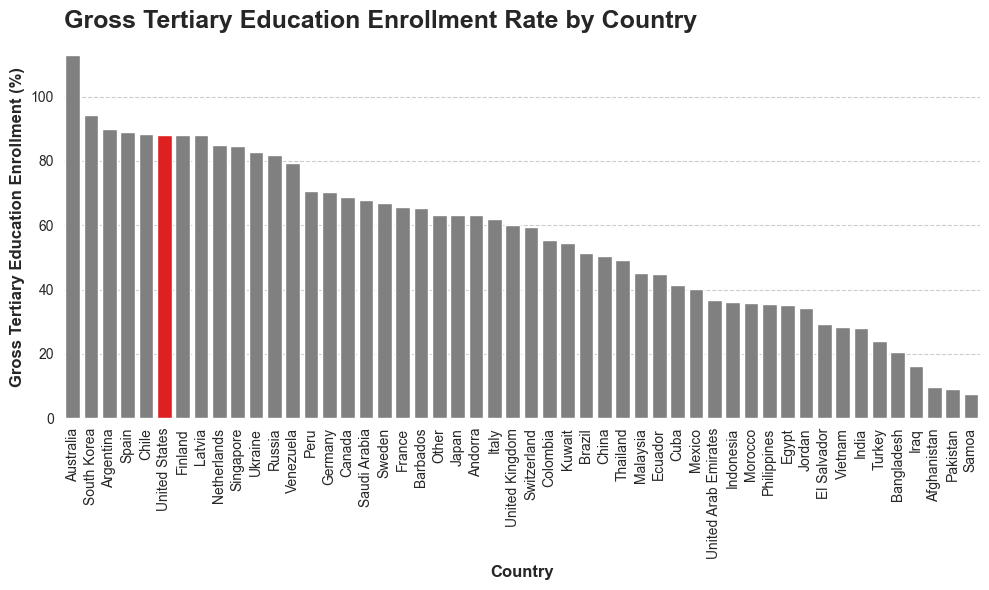

In [76]:
#Setup color for Gross Tertiary Education Enrollment Rate (%) chart
education_colors = []
for i in range(len(education_rate['Country'])):
    if education_rate['Country'][i] == 'United States':
        education_colors.append('red')
    else:
        education_colors.append('gray')
#Chart
plt.figure(figsize  = (10,6))
sb.barplot(data = education_rate, x = 'Country', y = 'Gross Tertiary Education Enrollment (%)', palette= education_colors)
plt.title('Gross Tertiary Education Enrollment Rate by Country', loc = 'left', fontweight = 'heavy', fontsize = 18)
plt.xlabel('Country', fontweight = 'heavy', fontsize = 12)
plt.ylabel('Gross Tertiary Education Enrollment (%)', fontweight = 'heavy', fontsize = 12)
plt.xticks(rotation = 90)
sb.despine(left=True, bottom=True)
plt.grid(axis = 'y', linestyle ='--')
plt.tight_layout()
plt.show();

**The Impact of the Gross Tertiary Enrollment Ratio (GTER) on the Success of YouTube Channels:**
- `Content Quality:` YouTube channels created by individuals with a high level of academic education (GTER) can produce more engaging and higher-quality educational content spanning various academic fields.
- `Communication and Teaching Skills:` Highly educated individuals may possess better communication and teaching skills, enhancing the effectiveness of online learning methods for viewers.
- `Target Market:` The tertiary enrollment ratio of a country indicates a potential market for educational content on YouTube. Countries with high GTER may exhibit a higher demand for educational and instructional content.


#### *9.3. Urban population rate in each country.*

In [77]:
#Create column 'Urbanization Rate (%)' in youtube dataset
youtube['Urbanization Rate (%)'] = round((youtube['Urban Population']/youtube['Population']) * 100,0)

urban_rate = youtube[['Country','Abbreviation', 'Urbanization Rate (%)']].sort_values(by= 'Urbanization Rate (%)', ascending= False).reset_index(drop= True)
urban_rate = urban_rate.drop_duplicates().reset_index(drop= True)
urban_rate.head(20)

Country Abbreviation  Urbanization Rate (%)
0              Singapore           SG                  100.0
1                 Kuwait           KW                  100.0
2              Argentina           AR                   92.0
3                  Japan           JP                   92.0
4            Netherlands           NL                   92.0
5                 Jordan           JO                   91.0
6              Venezuela           VE                   88.0
7                 Sweden           SE                   88.0
8                  Chile           CL                   88.0
9   United Arab Emirates           AE                   87.0
10                Brazil           BR                   86.0
11             Australia           AU                   85.0
12               Finland           FI                   85.0
13        United Kingdom           GB                   84.0
14          Saudi Arabia           SA                   84.0
15                Canada           CA                   83.0
16         United States           US                   82.0
17                Mexico           MX                   81.0
18              Colombia           CO                   81.0
19                 Spain           ES                   81.0

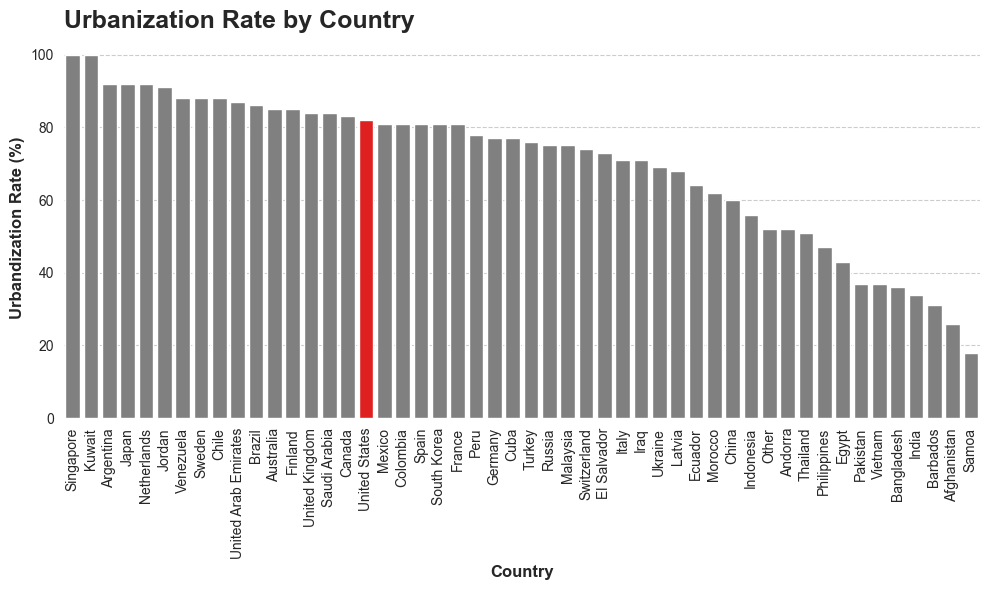

In [78]:
#Setup color for Urbanization Rate (%) chart
urban_colors = []
for i in range(len(urban_rate['Country'])):
    if urban_rate['Country'][i] == 'United States':
        urban_colors.append('red')
    else:
        urban_colors.append('gray')
#Chart
plt.figure(figsize  = (10,6))
sb.barplot(data = urban_rate, x = 'Country', y = 'Urbanization Rate (%)', palette= urban_colors)
plt.title('Urbanization Rate by Country', loc = 'left', fontweight = 'heavy', fontsize = 18)
plt.xlabel('Country', fontweight = 'heavy', fontsize = 12)
plt.ylabel('Urbandization Rate (%)', fontweight = 'heavy', fontsize = 12)
plt.xticks(rotation = 90)
sb.despine(left=True, bottom=True)
plt.grid(axis = 'y', linestyle ='--')
plt.tight_layout()
plt.show();

**The Impact of Urban Population Rate on the Success of YouTube Channels:**
- `Internet Accessibility:` Urban areas typically have better Internet infrastructure compared to rural areas. Therefore, urban residents can access the Internet more quickly and reliably, facilitating easy access to and consumption of YouTube content.
- `Demand for Urban Content:` Urban populations often have a demand for content related to urban life, culture, and social issues. YouTube channels creating content on these topics can attract a large audience in urban areas.
- `Better Advertising Market:` Urban areas usually have a more developed advertising market, presenting content creators in urban areas with better opportunities to collaborate with advertisers and earn revenue through YouTube advertising.
- `Larger Target Audience:` Urban areas generally have a larger population, meaning YouTube channels have the potential to reach a larger target audience.

*Comments:*    
- Based on the observations above, we can provide evidence for why the United States has become the country with the most successful YouTube channels:
    - According to Wikipedia and MS News, the United States is the third most populous country in the world with 336 million people. The unemployment rate is 14.7%, equivalent to 49 million people, a significant number.
    - With difficulties in unstable employment, certain unconventional paths may become relatively ideal choices, including building a personal YouTube channel. In the United States, a country with diverse life topics, anyone with creativity can find content to explore on the YouTube platform.
    - Additionally, the United States has the highest education level globally, with an 88.2% participation rate in higher education. This is a significant advantage as the workforce here has a high level of education. People with higher education can create high-quality, engaging content in areas related to education, research, etc. Moreover, they have excellent communication skills, making it easier for viewers to access knowledge.
    - In a country where the education system ranks first globally, continuous learning is inevitable. Currently, learning does not stop in the classroom but has expanded across multiple platforms thanks to the strong influence of the Internet. The `Education` category on YouTube is evidence as it consistently ranks among the top 5 categories with high subscriber counts and views. With 588 views per subscriber, it indicates significant potential in a category that individuals with a high level of education can strongly exploit.
    - Lastly, the location is crucial for the development of the two aforementioned points. With 82% of the population living in urban areas, where people easily access the Internet and use various platforms, including YouTube. High urban population correlates with a broader user content trend. Along with that, it provides a good opportunity to collaborate and advertise with companies or brands through sponsorship contracts, helping urban YouTube channels earn more money.

### *Task 10: In which year were the most successful YouTube channels established?*

In [79]:
cnt_created_year = youtube.groupby('Created Year').size().to_frame().reset_index().rename(columns= {0 : 'Count'})
cnt_created_year.sort_values(by = 'Count', ascending= False)

Created Year  Count
9           2014     95
1           2006     89
6           2011     81
11          2016     76
8           2013     71
10          2015     70
7           2012     68
12          2017     63
4           2009     52
2           2007     49
5           2010     48
3           2008     45
13          2018     43
14          2019     33
15          2020     30
0           2005     25
16          2021     23
17          2022      5

<Figure size 1200x800 with 0 Axes>

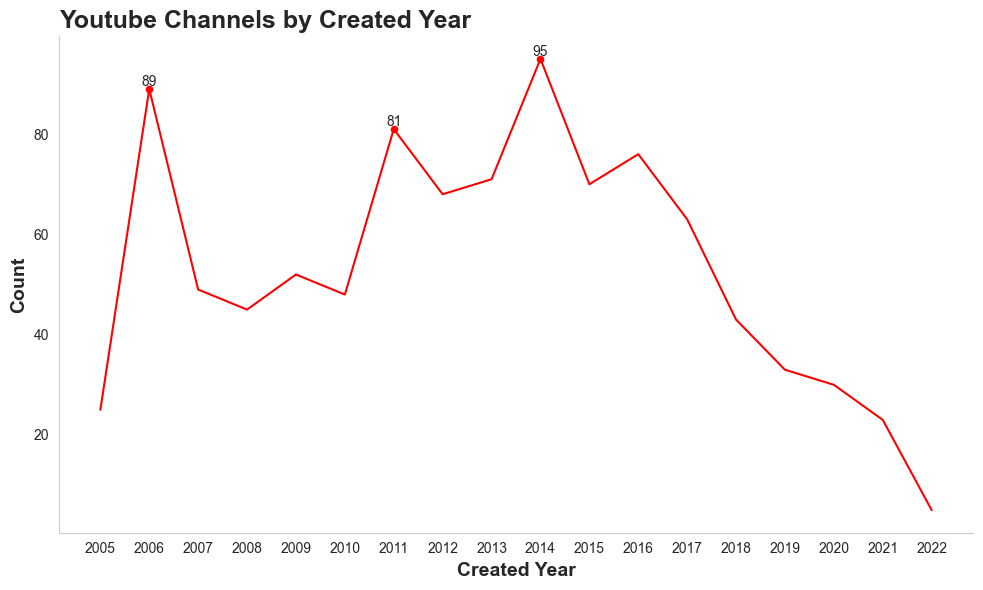

In [80]:
sb.set_style("whitegrid",{'axes.grid' : False})
plt.figure(figsize= (12,8))

plt.figure( figsize= (10,6))
plt.title('Youtube Channels by Created Year', loc = 'left', fontweight = 'heavy', fontsize = 18)
sb.lineplot(data = cnt_created_year, y = 'Count', x = 'Created Year', color = 'red')

label_points = [(2014, 95), (2006, 89), (2011, 81)]
for point in label_points:
    plt.text(point[0], point[1], f'{point[1]}', ha='center', va='bottom')

for point in label_points:
    x, y = point
    plt.scatter(x, y, color='red', marker='o', s=20)
    
plt.xlabel('Created Year', fontweight = 'heavy', fontsize = 14)
plt.ylabel('Count', fontweight = 'heavy', fontsize = 14)
sb.despine(left=False, bottom=False)
# plt.grid(axis = 'x', linestyle ='-.')
plt.tight_layout()
plt.xticks(cnt_created_year['Created Year'])
plt.show()

*Observations:*  
- It can be observed that the most successful YouTube channels emerged in three significant years: 2006, 2011, and 2015.
  - Birth of YouTube: Established and introduced to the public in 2005, it wasn't until 2006 that YouTube truly began to capture widespread attention and experience significant growth. During this period, the YouTube platform was still fresh, and the competition wasn't too fierce, allowing many channels to quickly emerge and build a dedicated fan base in the early stages.
  - Platform Momentum: According to Wikipedia, with over three billion views per day and 48 hours of footage uploaded per minute in 2011, the platform grew rapidly, becoming an integral part of people's daily lives. The integration of the social network Google+ directly with YouTube and the Chrome web browser laid the foundation for interaction between viewers and creators. Additionally, 2011 saw the emergence of various content genres, including entertainment, tutorials, vlogs, gaming, opening up numerous opportunities for content creators on YouTube.
  - Social Media Integration: In 2015, the explosion of social media platforms like Facebook and Twitter, along with YouTube integration, brought a large audience to channels. Alongside the development of smartphones and mobile apps, YouTube user demographics diversified. Coupled with the growth of online advertising, this helped many YouTube channels attract investment from advertising companies, creating a stable income source. This period witnessed the birth of many YouTube channels, seen as a lucrative profession.


### *Task 11: Content creation trends over time for these channels.*

In [81]:
top_cnt_channel_by_year = youtube.groupby(['Created Year', 'Category'])['Youtuber'].count().reset_index().sort_values(by='Youtuber', ascending= False).drop_duplicates(subset='Created Year').sort_values(by='Created Year')
top_cnt_channel_by_year.reset_index(drop= True, inplace=True)
top_cnt_channel_by_year

Created Year        Category  Youtuber
0           2005           Music         9
1           2006   Entertainment        22
2           2007           Music        17
3           2008           Music        15
4           2009           Music        24
5           2010           Music        18
6           2011           Music        23
7           2012           Music        18
8           2013   Entertainment        19
9           2014   Entertainment        18
10          2015   Entertainment        25
11          2016  People & Blogs        17
12          2017  People & Blogs        19
13          2018   Entertainment        10
14          2019           Other        10
15          2020   Entertainment         8
16          2021  People & Blogs         7
17          2022   Entertainment         2

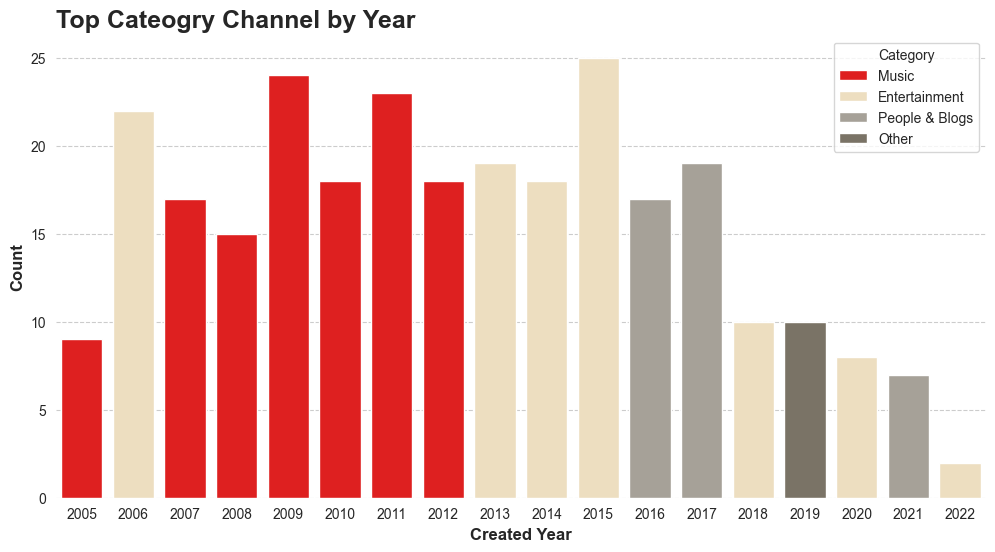

In [82]:
plt.figure(figsize= (12,6))
sb.barplot(data = top_cnt_channel_by_year, x = 'Created Year', y = 'Youtuber', hue = 'Category', dodge=False, palette= youtube_color_barchart_freestyle2) 
plt.title('Top Cateogry Channel by Year', loc = 'left', fontweight = 'heavy', fontsize = 18)
plt.xlabel('Created Year', fontweight = 'heavy', fontsize = 12)
plt.ylabel('Count', fontweight = 'heavy', fontsize = 12)
plt.xticks(rotation = 0, ha = 'center')
sb.despine(left=True, bottom=True)
plt.grid(axis = 'y', linestyle ='--')
plt.show()

*Observations:*  
- The `Music` and `Entertainment` categories are the leading trends in content creation for the most successful YouTube channels, being present in 14 out of the platform's 18 years of existence and development.
- The transition from music to entertainment is easily noticeable in channel creation trends:
  - Period from 2007 to 2012: The trend in channel creation focused on the music category. During this period, as the Internet boom unfolded, music also rapidly evolved from physical formats like CDs and tapes to online music platforms such as Apple's iTunes in 2003 or Spotify in 2006. In 2005, YouTube emerged as a historic turning point for the music industry, allowing individuals to enjoy on-demand videos anywhere with an internet connection. A video with both audio and visuals, free for YouTube users, directly competed with established music platforms.
  - Period from 2013 to 2022: The trend in channel creation primarily focused on the Entertainment category, although not as dominant as the previous music trend. The three years following the music trend's development saw YouTube gradually gaining popularity. The increasing user base drove channel creation on this platform, expanding beyond music development. Entertainment emerged as an essential need for daily human life. The robust growth of entertainment content on the YouTube platform started in 2013, reaching its peak in the number of successful channels in 2015.
  - As time progressed, user trends became more diverse. In the period of robust entertainment trend development, the People & Blogs theme emerged. In 2016-2017, the growth of social networks and integrated video encouraged the development of channels with People & Blogs content. Daily life content, vlogs, and personal conversations attracted millions of views and followers worldwide.


### *Task 12: Average monthly profitability in each category.*

In [83]:
potentially_lucrative = youtube[['Category', 'Lowest Monthly Earnings', 'Highest Monthly Earnings']]
potentially_lucrative.sample(5)

Category  Lowest Monthly Earnings  Highest Monthly Earnings
621  People & Blogs                  4900.00                  79000.00
346   Entertainment                 29600.00                 473600.00
339       Education                     0.00                      0.00
785  People & Blogs                 57900.00                 926200.00
764           Music                     0.04                      0.59

In [84]:
potentially_lucrative['Average Monthly Earnings'] = (potentially_lucrative['Lowest Monthly Earnings'] + potentially_lucrative['Highest Monthly Earnings'])/2
potentially_lucrative.sample(5)

Category  Lowest Monthly Earnings  Highest Monthly Earnings  \
486          Entertainment                   8800.0                  141300.0   
825        News & Politics                  28900.0                  461800.0   
547        News & Politics                  32800.0                  524800.0   
79   Nonprofits & Activism                  11400.0                  182600.0   
506       Film & Animation                    209.0                    3400.0   

     Average Monthly Earnings  
486                   75050.0  
825                  245350.0  
547                  278800.0  
79                    97000.0  
506                    1804.5

In [85]:
category_avg_earnings = potentially_lucrative.groupby('Category')['Average Monthly Earnings'].mean().reset_index()
category_avg_earnings['Average Monthly Earnings (1000$)'] = (category_avg_earnings['Average Monthly Earnings'] /1000).astype('int')
category_avg_earnings.sort_values(by= 'Average Monthly Earnings (1000$)', ascending= False, inplace= True)
category_avg_earnings.reset_index(drop = True, inplace= True)
category_avg_earnings

Category  Average Monthly Earnings  \
0                   Shows              1.239268e+06   
1                   Other              6.365854e+05   
2        Autos & Vehicles              5.773250e+05   
3                  Sports              4.285000e+05   
4          Pets & Animals              4.222039e+05   
5        Film & Animation              3.924375e+05   
6               Education              3.766251e+05   
7                  Comedy              3.550899e+05   
8         News & Politics              3.414123e+05   
9           Entertainment              3.384038e+05   
10         People & Blogs              2.980894e+05   
11                  Music              2.963804e+05   
12                 Movies              2.415500e+05   
13  Nonprofits & Activism              2.074000e+05   
14               Trailers              1.922500e+05   
15                 Gaming              1.440938e+05   
16   Science & Technology              1.073393e+05   
17          Howto & Style              1.024930e+05   
18        Travel & Events              6.590000e+04   

    Average Monthly Earnings (1000$)  
0                               1239  
1                                636  
2                                577  
3                                428  
4                                422  
5                                392  
6                                376  
7                                355  
8                                341  
9                                338  
10                               298  
11                               296  
12                               241  
13                               207  
14                               192  
15                               144  
16                               107  
17                               102  
18                                65

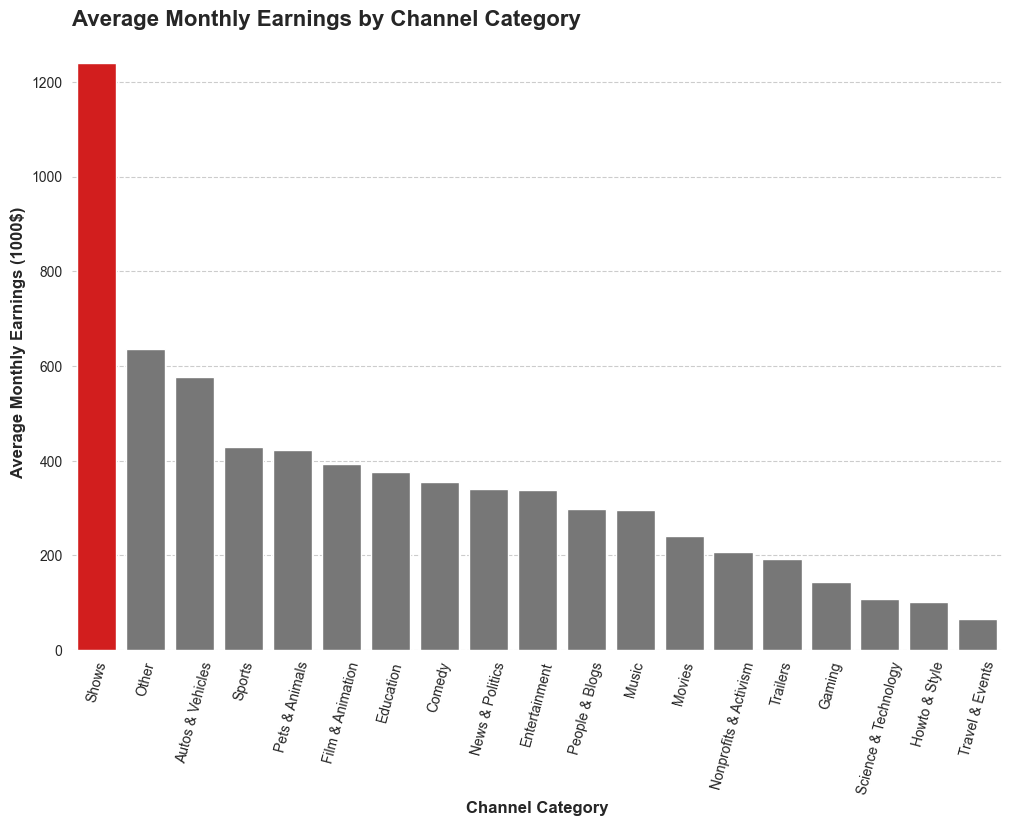

In [86]:
plt.figure(figsize=(12,8))
sb.barplot(data= category_avg_earnings, x = 'Category', y = 'Average Monthly Earnings (1000$)', palette= youtube_color_barchart_freestyle3)
plt.title('Average Monthly Earnings by Channel Category', loc = 'left', fontweight = 'heavy', fontsize = 16)
sb.despine(left=True, bottom=True)
plt.grid(axis = 'y', linestyle ='--')
plt.xlabel('Channel Category', fontweight = 'heavy', fontsize = 12)
plt.ylabel('Average Monthly Earnings (1000$)', fontweight = 'heavy', fontsize = 12)
plt.xticks(rotation = 75)
plt.show()

*Observations:*  
- Some channels that couldn't be categorized have the second-highest average monthly income on the ranking. This is an exception created due to the lack of category data. It does not significantly impact other categories, as it represents only about 3% of the data, so it may be considered for exclusion in the analysis of the chart.
- The 'Show' category stands out as the most lucrative category for channels, ranking first with an average monthly income of over 1.2 million dollars. This figure is more than double compared to the adjacent categories. The nature of Shows allows for collaborations with production companies or other commercial partners to create advertising content, attracting third-party sponsorship significantly increasing income.
- Although previous analyses indicated that 'Music' and 'Entertainment' are among the top popular categories, it is surprising to see them ranked at average to lower levels in terms of income potential. This difference raises questions about the relationship between viewership, popularity, and revenue potential on the platform. A YouTube channel with high income does not necessarily depend solely on user views but can come from diverse sources of income.

### *Task 13: Is it true that higher views result in higher channel revenue?*

In [87]:
#Select 4 columns (Youtuber, Video Views, Lowest Monthly Earnings and Highest Monthly Earnings) 
views_earnings = youtube[['Youtuber', 'Video Views', 'Lowest Monthly Earnings', 'Highest Monthly Earnings']]

#Add column Avg for Earnings
views_earnings['Average Monthly Earnings'] = (views_earnings['Lowest Monthly Earnings'] + views_earnings['Highest Monthly Earnings'])/2

#Change the unit of Earnings (1000$)
views_earnings['Average Monthly Earnings (1000$)'] = (views_earnings['Average Monthly Earnings'] /1000).astype('int')

#Change the unit of Video Views (billion)
views_earnings['Video Views (billion)'] = (views_earnings['Video Views'] /1000000000).astype('int')

#Select final column
views_earnings = views_earnings[['Youtuber', 'Video Views (billion)', 'Average Monthly Earnings (1000$)']]

#Show statistics table
views_earnings.head()

Youtuber  Video Views (billion)  \
0                    T-Series                    228   
1                     MrBeast                     28   
2  Cocomelon - Nursery Rhymes                    164   
3                   SET India                    148   
4             Kids Diana Show                     93   

   Average Monthly Earnings (1000$)  
0                              4782  
1                              2868  
2                              4196  
3                              3877  
4                              1541

In [88]:
# Calculate the correlation coefficient
correlation = views_earnings['Average Monthly Earnings (1000$)'].corr(views_earnings['Video Views (billion)'])

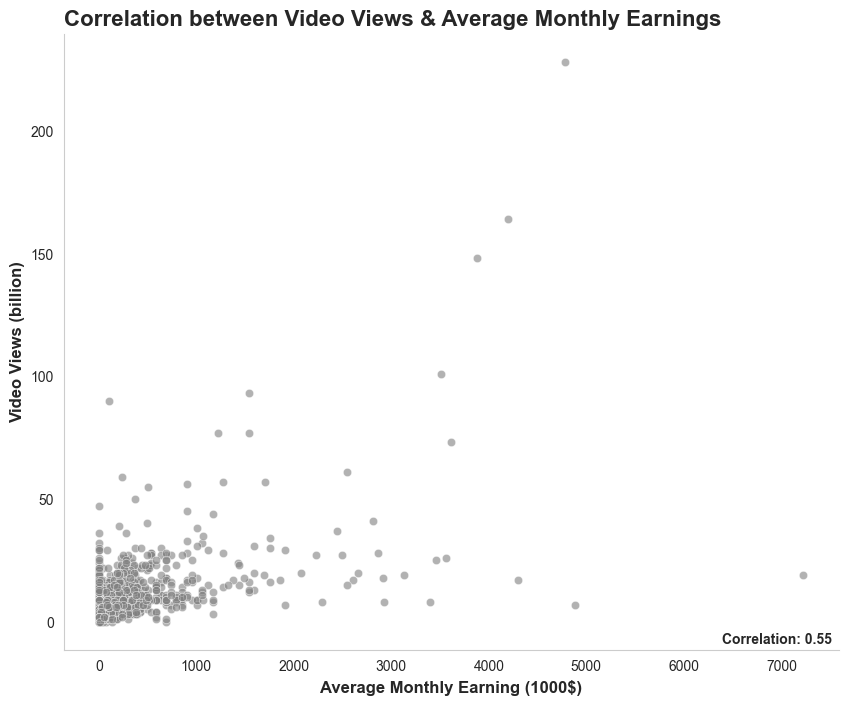

In [89]:
#Edit chart
sb.set_style("whitegrid",{'axes.grid' : False})
plt.figure(figsize=(10,8))
sb.scatterplot(data = views_earnings, x = 'Average Monthly Earnings (1000$)', y = 'Video Views (billion)', color = 'gray', alpha = 0.6)
plt.title('Correlation between Video Views & Average Monthly Earnings', loc = 'left', fontsize = 16, fontweight = 'heavy')
plt.xlabel('Average Monthly Earning (1000$)', fontsize = 12, fontweight = 'heavy')
plt.ylabel('Video Views (billion)', fontsize = 12, fontweight = 'heavy')

sb.despine(left=False, bottom=False)
plt.grid(axis = 'y', linestyle ='')
# Note correlation
plt.annotate(f'Correlation: {correlation:.2f}', 
             xy = (0.85, 0.01), 
             xycoords = 'axes fraction', 
             fontsize = 10, 
             weight = 'bold')
plt.show()

*Observations:*  
- Although there is a positive correlation, it's not excessively strong. This indicates that high views alone don't guarantee correspondingly high income. Other factors, such as video duration, user interaction, or ad placement, may influence channel revenue.
- Video quality may be more important than absolute quantity (e.g., viewer retention rate, ad click-through rate, etc.). Channels focusing on creating engaging, high-quality content to attract loyal users may generate higher average monthly income even with fewer views.
- This correlation somewhat reinforces the earlier point that successful YouTube channels can have diverse revenue sources, including merchandise sales, sponsored content, affiliate marketing, and fan contributions. This makes them less reliant on traditional advertising revenue or user view income.


## **VI. Conclusion**

There are numerous factors determining the success of a YouTube channel, while this analysis is based on the provided variables, more data is needed to provide deeper and more useful insights for those looking to engage with this platform. Some factors influencing a YouTube channel's success and key trends that can be drawn from this dataset are as follows:  
`Factors Determining Channel Success:`  
- `Loyal Subscriber Base:` Channels with a strong subscriber base tend to attract more video views. Building a loyal subscriber base takes time and effectiveness in delivering content that resonates with viewers, explaining why channels established in significant periods tend to be successful. Overall, it's a process of persistence and continuous creativity.  
- `Appropriate Content Selection:` Categories like Entertainment, Music, Gaming, or Comedy dominate in popularity. Channels creating content from these categories often attract more viewers, especially in entertainment and music. While Education and How-to & Style categories rank relatively high, they may not reach the top but still demonstrate the essential role these channels play for the audience. "Show" stands out with the highest views per subscriber, implying a substantial following and high-quality content. However, it can be observed that some categories with content that tends to go viral or is search-friendly are not necessarily effective, only attracting unsustainable views, as exemplified by the Travel & Events category.  
- `Income Not Solely Dependent on Views:` Although views have a positive correlation with income, it's not particularly strong. A channel's income may depend on factors like user interaction, video duration, or ad placement. This dataset's limitations make it challenging to determine effective income sources from the platform. However, overall, the "Show" category appears to offer significant earning opportunities, even though music and entertainment are more popular.  
- `Quality Over Quantity:` Uploading many videos doesn't necessarily result in more subscribers or corresponding views. Top YouTubers prioritize content quality because it is the most critical factor. Videos must provide value to viewers, being engaging and interesting to drive interaction and satisfy the target audience's needs.  
- `Consistency:` There is always a close connection between video content, channel category, and channel name. This connection helps viewers easily find the content they need, increasing the likelihood of recommendations during searches, broadening the channel's reach.
  
`User Trends through the Most Successful YouTube Channels:`  
- In the past, during the platform's initial development, music was the primary user trend, lasting continuously for six years (from 2007 to 2012). From the latter half of the timeline to the present, user trends have gradually shifted towards more entertainment content, especially in the Entertainment category.  
- Music and entertainment are currently the two most popular categories on the platform (leading in terms of subscribers and views). However, the Show category has the highest user view frequency through views per subscriber, suggesting that Shows currently offer content that attracts potential customers, those likely to revisit channel content.  
- A commonality among these three categories is creating diverse entertainment trends for users.  

`Suggestions for Building an Effective YouTube Channel in the Future:`  
- `Define Content and Build a Suitable User Group:` In an increasingly diverse world with various topics, finding content that aligns with one's creative abilities and determining a relevant target audience is the first step when entering this platform.  
- `Quality Content:` As emphasized throughout the analysis, content is always the top priority. A channel with compelling and audience-responsive videos has the potential to convert views into subscriptions.  
- `Interaction with Viewers:` Comment feedback, social media interaction, and building a supportive community are crucial in establishing loyal followers.  
- `Cross-Platform Sharing:` Sharing videos and content (release schedules, demo videos, teasers, etc.) on linked platforms alongside YouTube can enhance visibility and reach target audiences.  
- `SEO (Search Engine Optimization):` Optimize both video content and descriptions to increase visibility in YouTube search results.
- `Build Personal Branding:` Continuously update and supplement necessary knowledge to develop expertise in the channel's core content. Utilize personal creativity to create unique, standout content compared to other channels.  
- `Time and Patience:` Building a channel and creating a large loyal user base is a long-term process. Perseverance, continuous effort to keep up with contemporary trends, is essential for any YouTuber.  